In [126]:
## Loading the Libraries
    library(ggplot2)

## Necessaris
options(scipen=9999)

In [143]:
setwd("C:\\Users\\KASTU1\\Desktop\\Analytics Path\\R\\Data\\Kaggle\\HousePricePrediction")
getwd()

## Reading the file
home_est=read.csv("house_pricing_kaggle.csv",head = T, sep = "|")
head(home_est)
summary(home_est)

    

[1] "C:/Users/KASTU1/Desktop/Analytics Path/R/Data/Kaggle/HousePricePrediction"

MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
2000,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2000,RL,75,10084,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,WD,Normal,307000
2000,RL,70,11200,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,129500
2000,FV,NA,4403,Pave,NA,IR2,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2010,New,Partial,222000
2000,RL,91,10652,Pave,NA,IR1,,AllPub,Inside,...,0,NA,NA,NA,0,8,2007,New,Partial,279500
2000,RL,66,13695,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,6,2008,WD,Normal,159000


   MSSubClass       MSZoning     LotFrontage        LotArea        Street    
 Min.   :   40   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 1st Qu.:   60   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 Median :  180   RH     :  16   Median : 69.00   Median :  9478              
 Mean   : 1585   RL     :1151   Mean   : 70.05   Mean   : 10517              
 3rd Qu.: 2000   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 Max.   :12000                  Max.   :313.00   Max.   :215245              
                                NA's   :259                                  
  Alley      LotShape  LandContour  Utilities      LotConfig    LandSlope 
 Grvl:  50   IR1:484      :   1    AllPub:1459   Corner : 263   Gtl:1382  
 Pave:  41   IR2: 41   Bnk:  63    NoSeWa:   1   CulDSac:  94   Mod:  65  
 NA's:1369   IR3: 10   HLS:  50                  FR2    :  47   Sev:  13  
             Reg:925   Low:  36                  FR3    :   4             
 

[1] 0

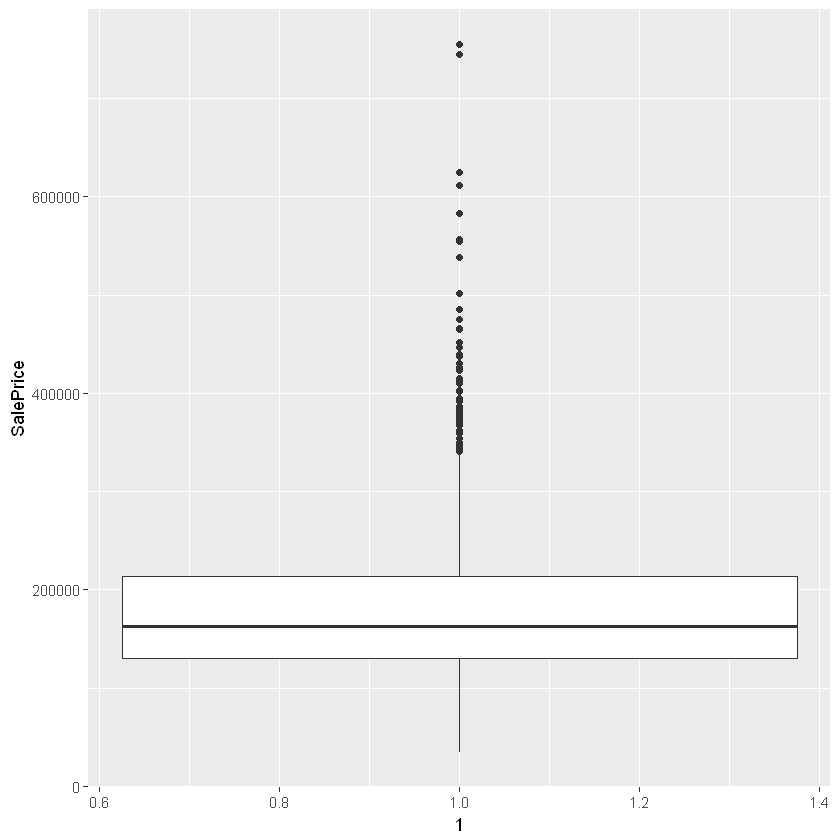

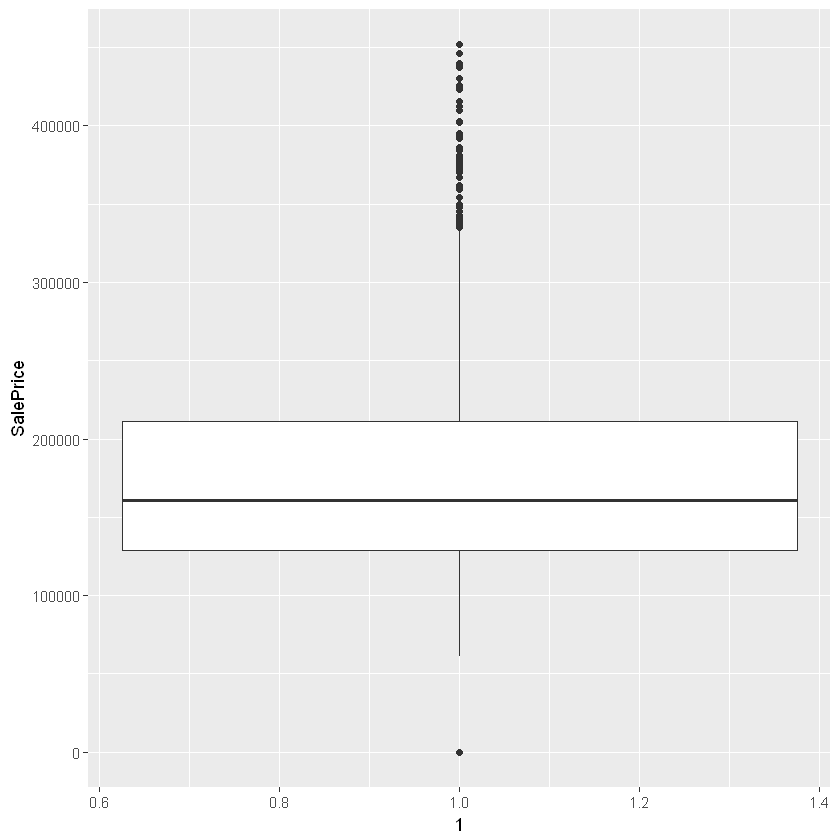

In [144]:
### Handling target SalePrice variable
home_est$sp=log(home_est$SalePrice)
sum(is.na(home_est$SalePrice))
UW=qnorm(0.75,mean(home_est$sp),sd(home_est$sp))+(1.5*IQR(home_est$sp))
LW=qnorm(0.25,mean(home_est$sp),sd(home_est$sp))-(1.5*IQR(home_est$sp))
ggplot(home_est,aes(1,SalePrice))+geom_boxplot()
home_est[home_est$sp>UW,"SalePrice"]=quantile(home_est$sp,probs = c(0.95))
home_est[home_est$sp<LW,"SalePrice"]=quantile(home_est$sp,probs = c(0.05))
ggplot(home_est,aes(1,SalePrice))+geom_boxplot()


In [116]:
## Working on the columns
    ## Converting the MSSubclass to Factor
        home_est$MSSubClass=as.factor(home_est$MSSubClass)
        

[1] 0 1 2
Levels: 0 1 2

[1] "40"    "45"    "50"    "60"    "70"    "75"    "80"    "85"    "90"   
[10] "160"   "180"   "190"   "2000"  "12000"

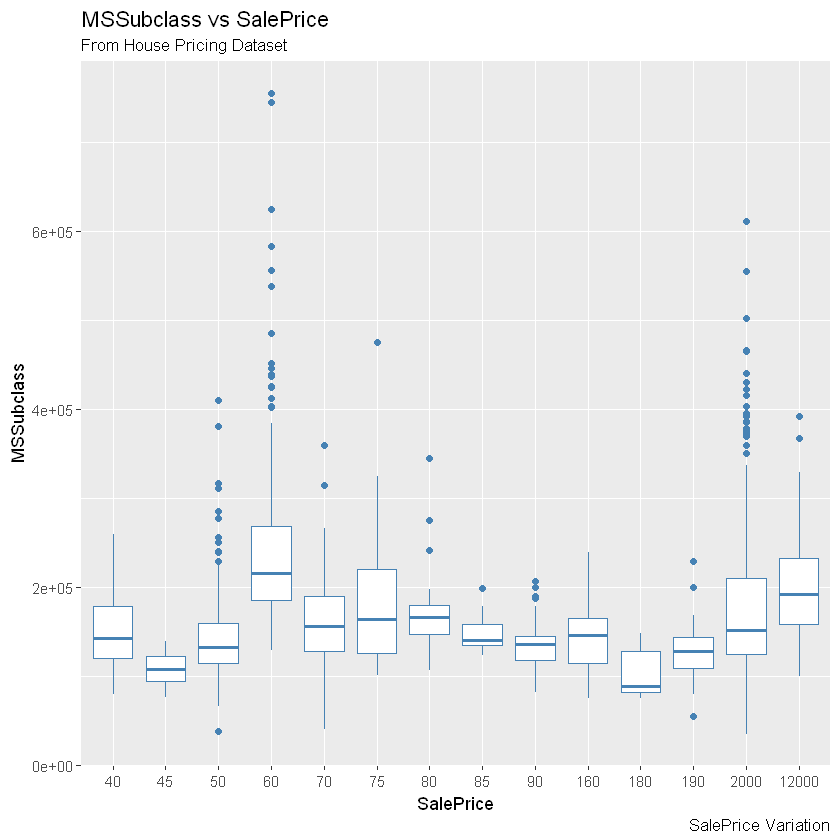

In [14]:
## Working with the MSSubclass factor columns
levels(home_est$MSSubClass)
ggplot(home_est,aes(MSSubClass,SalePrice))+geom_boxplot(col="steelblue")+labs(title="MSSubclass vs SalePrice", subtitle="From House Pricing Dataset", y="MSSubclass", x="SalePrice", caption="SalePrice Variation")


[1] "C (all)" "FV"      "RH"      "RL"      "RM"

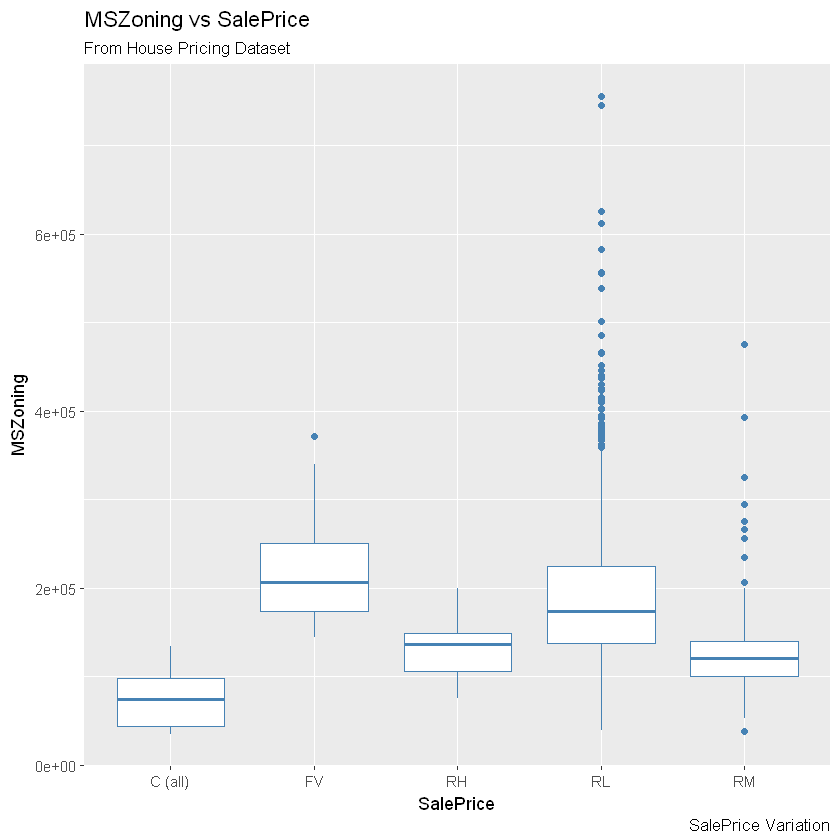

In [16]:
## Working with the MSZoning factor columns
levels(home_est$MSZoning)
ggplot(home_est,aes(MSZoning,SalePrice))+geom_boxplot(col="steelblue")+labs(title="MSZoning vs SalePrice", subtitle="From House Pricing Dataset", y="MSZoning", x="SalePrice", caption="SalePrice Variation")

[1] "Grvl" "Pave"

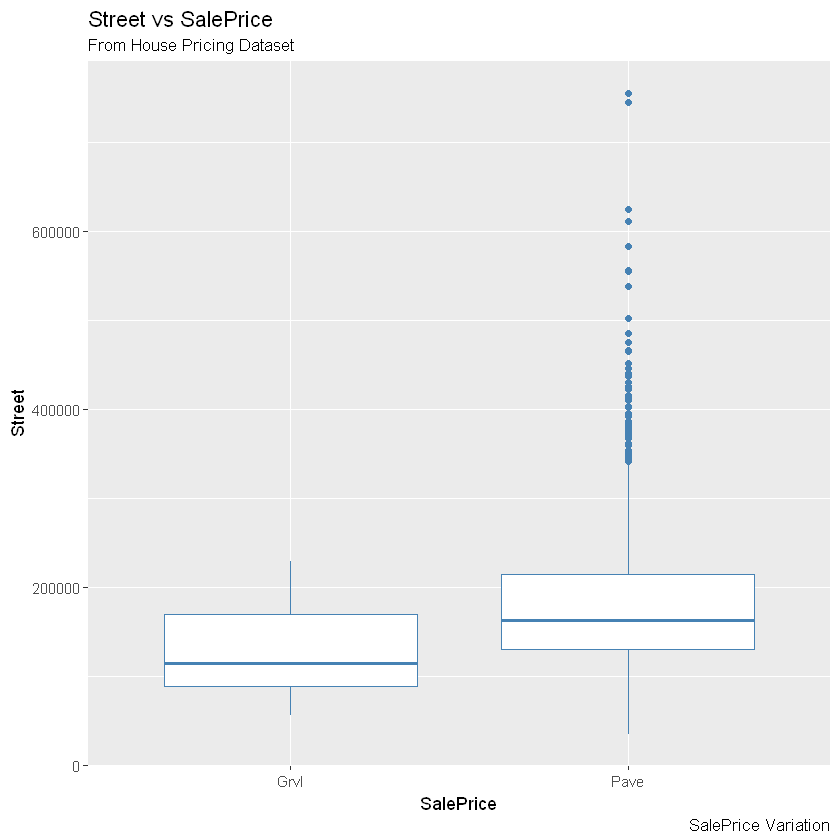

In [19]:
## Working with the Street factor columns
levels(home_est$Street)
ggplot(home_est,aes(Street,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Street vs SalePrice", subtitle="From House Pricing Dataset", y="Street", x="SalePrice", caption="SalePrice Variation")

[1] "Grvl" "Pave"

[1] 1369


Grvl Pave 
  50   41 

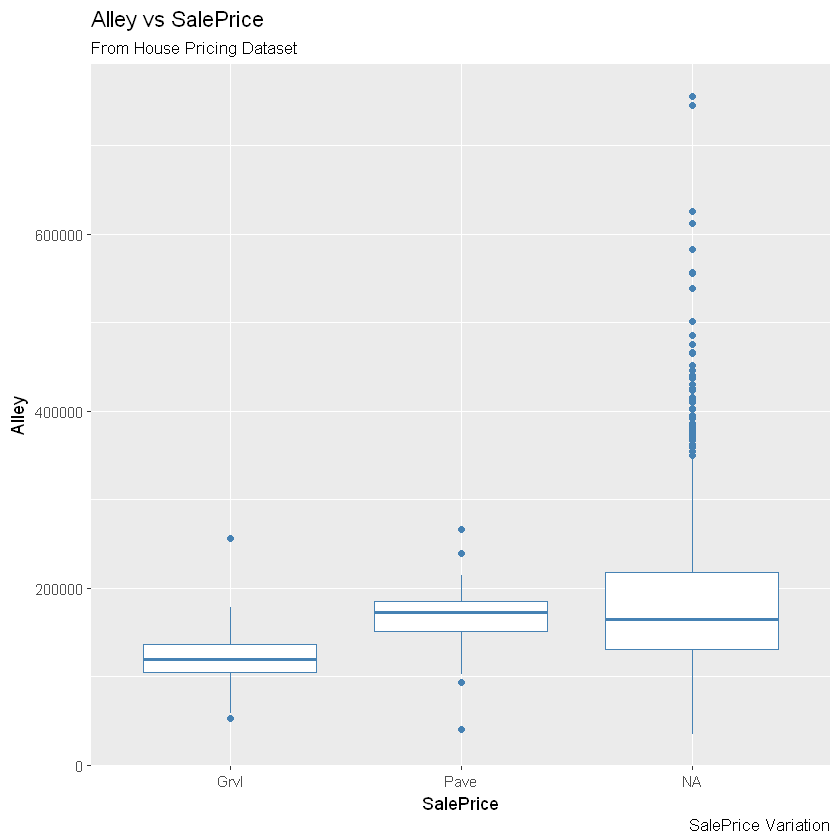

In [27]:
## Working with the Alley factor columns
levels(home_est$Alley)
sum(is.na(home_est$Alley))
table(home_est$Alley)
ggplot(home_est,aes(Alley,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Alley vs SalePrice", subtitle="From House Pricing Dataset", y="Alley", x="SalePrice", caption="SalePrice Variation")

[1] "IR1" "IR2" "IR3" "Reg"

[1] 0


IR1 IR2 IR3 Reg 
484  41  10 925 

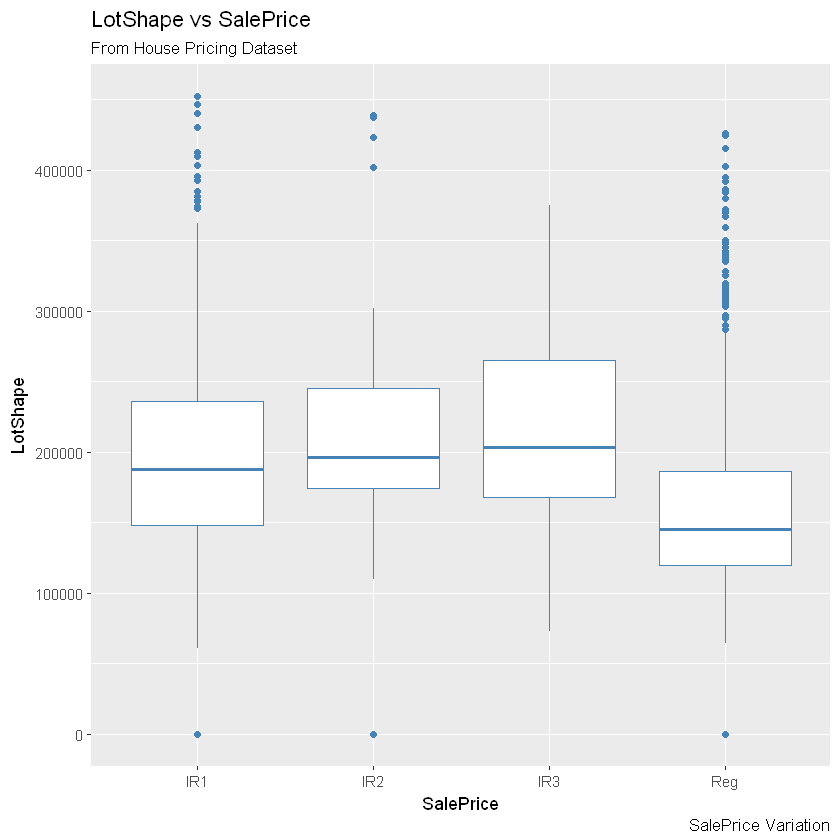

In [57]:
## Working with the LotShape factor columns
levels(home_est$LotShape)
sum(is.na(home_est$LotShape))
table(home_est$LotShape)
ggplot(home_est,aes(LotShape,SalePrice))+geom_boxplot(col="steelblue")+labs(title="LotShape vs SalePrice", subtitle="From House Pricing Dataset", y="LotShape", x="SalePrice", caption="SalePrice Variation")

[1] ""    "Bnk" "HLS" "Low" "Lvl"

[1] 0


      Bnk  HLS  Low  Lvl 
   1   63   50   36 1310 

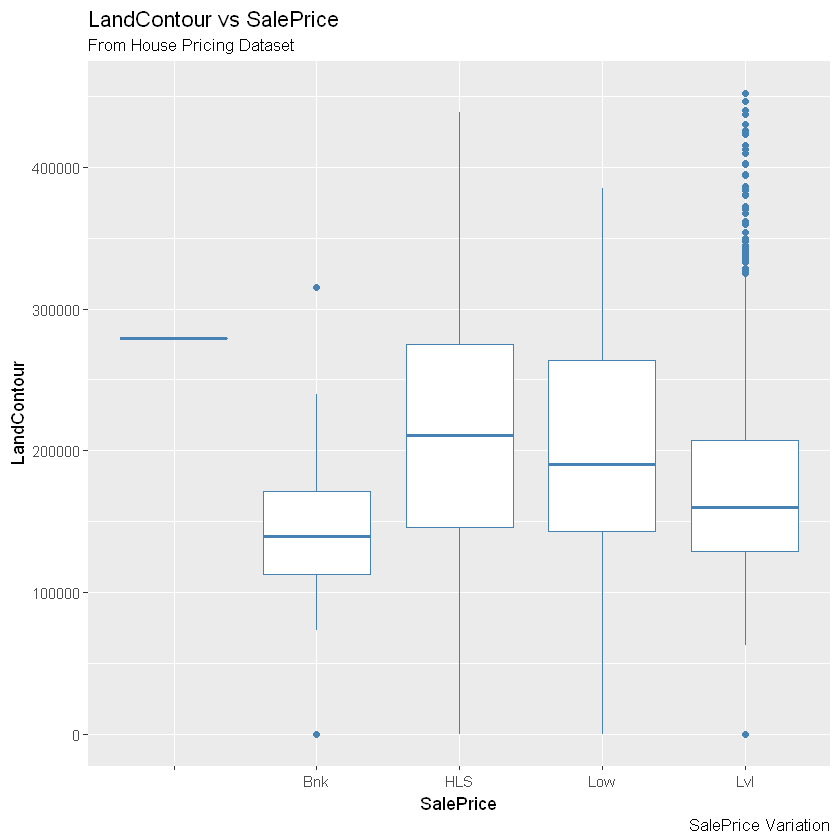

In [58]:
## Working with the LandContour factor columns
levels(home_est$LandContour)
sum(is.na(home_est$LandContour))
table(home_est$LandContour)
ggplot(home_est,aes(LandContour,SalePrice))+geom_boxplot(col="steelblue")+labs(title="LandContour vs SalePrice", subtitle="From House Pricing Dataset", y="LandContour", x="SalePrice", caption="SalePrice Variation")

[1] "AllPub" "NoSeWa"

[1] 0


AllPub NoSeWa 
  1459      1 

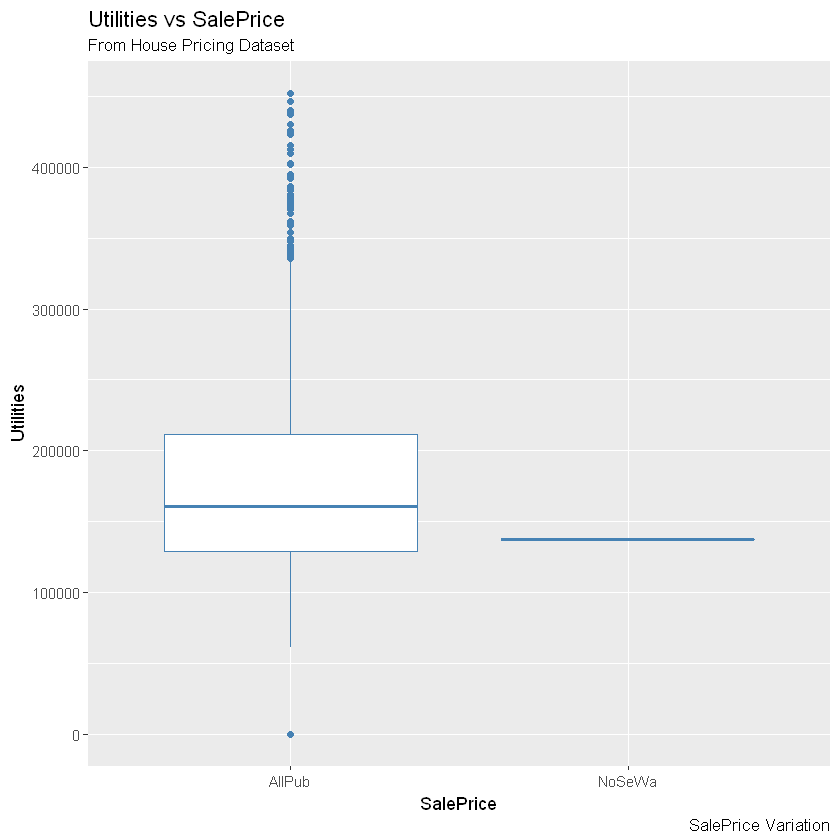

In [59]:
## Working with the Utilities factor columns
levels(home_est$Utilities)
sum(is.na(home_est$Utilities))
table(home_est$Utilities)
ggplot(home_est,aes(Utilities,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Utilities vs SalePrice", subtitle="From House Pricing Dataset", y="Utilities", x="SalePrice", caption="SalePrice Variation")

[1] "Corner"  "CulDSac" "FR2"     "FR3"     "Inside"

[1] 0


 Corner CulDSac     FR2     FR3  Inside 
    263      94      47       4    1052 

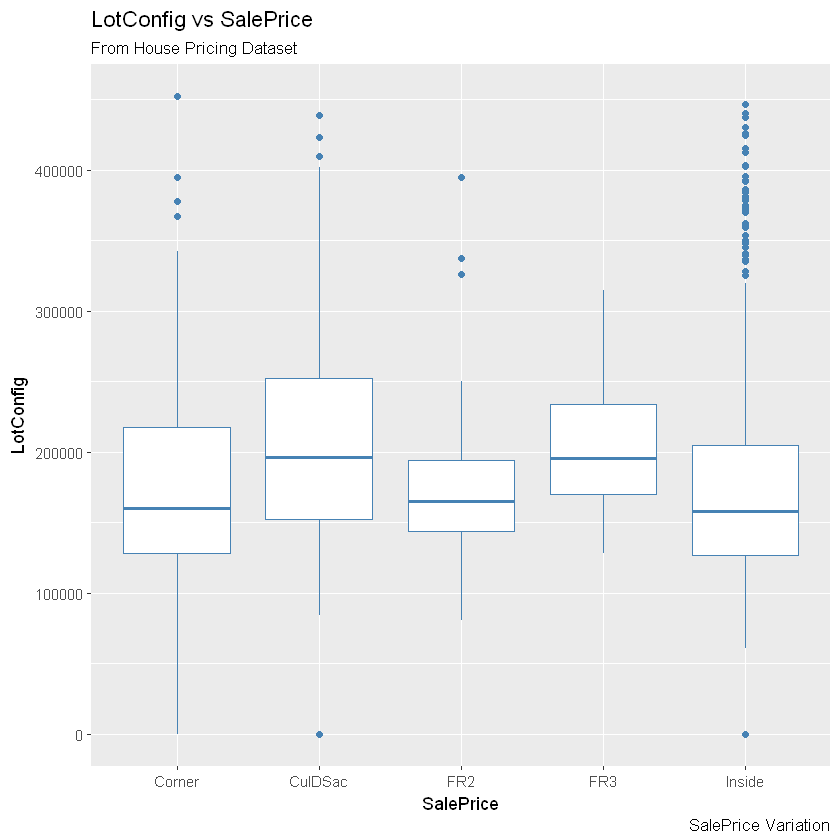

In [60]:
## Working with the LotConfig factor columns
levels(home_est$LotConfig)
sum(is.na(home_est$LotConfig))
table(home_est$LotConfig)
ggplot(home_est,aes(LotConfig,SalePrice))+geom_boxplot(col="steelblue")+labs(title="LotConfig vs SalePrice", subtitle="From House Pricing Dataset", y="LotConfig", x="SalePrice", caption="SalePrice Variation")

[1] "Gtl" "Mod" "Sev"

[1] 0


 Gtl  Mod  Sev 
1382   65   13 

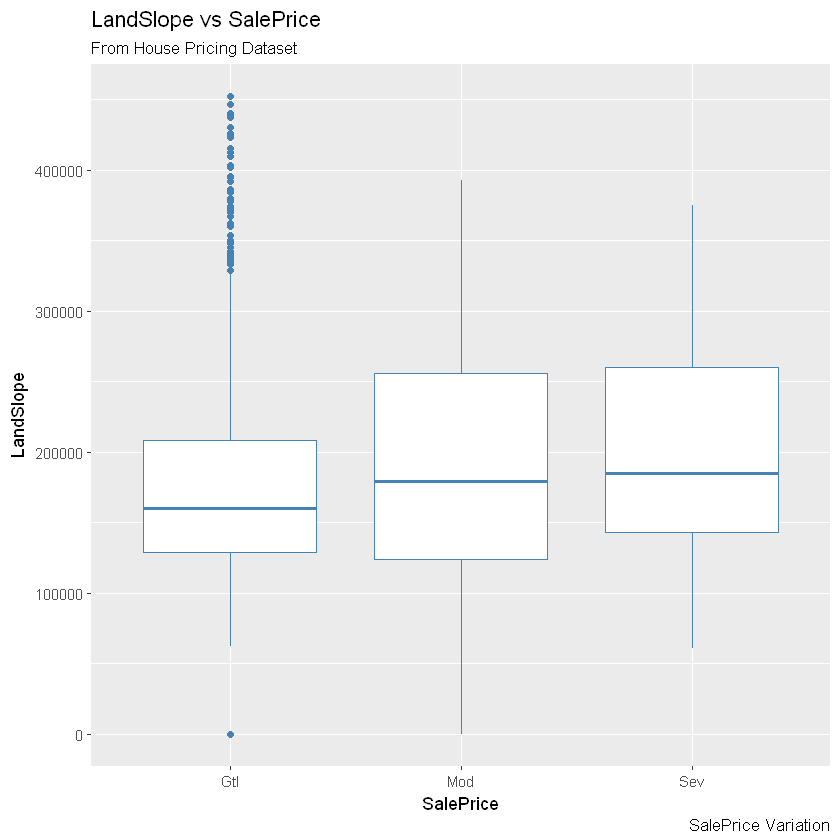

In [61]:
## Working with the LandSlope factor columns
levels(home_est$LandSlope)
sum(is.na(home_est$LandSlope))
table(home_est$LandSlope)
ggplot(home_est,aes(LandSlope,SalePrice))+geom_boxplot(col="steelblue")+labs(title="LandSlope vs SalePrice", subtitle="From House Pricing Dataset", y="LandSlope", x="SalePrice", caption="SalePrice Variation")

[1] "Blmngtn" "Blueste" "BrDale"  "BrkSide" "ClearCr" "CollgCr" "Crawfor"
 [8] "Edwards" "Gilbert" "IDOTRR"  "MeadowV" "Mitchel" "NAmes"   "NoRidge"
[15] "NPkVill" "NridgHt" "NWAmes"  "OldTown" "Sawyer"  "SawyerW" "Somerst"
[22] "StoneBr" "SWISU"   "Timber"  "Veenker"

[1] 0


Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  IDOTRR 
     17       2      16      58      28     150      51     100      79      37 
MeadowV Mitchel   NAmes NoRidge NPkVill NridgHt  NWAmes OldTown  Sawyer SawyerW 
     17      49     225      41       9      77      73     113      74      59 
Somerst StoneBr   SWISU  Timber Veenker 
     86      25      25      38      11 

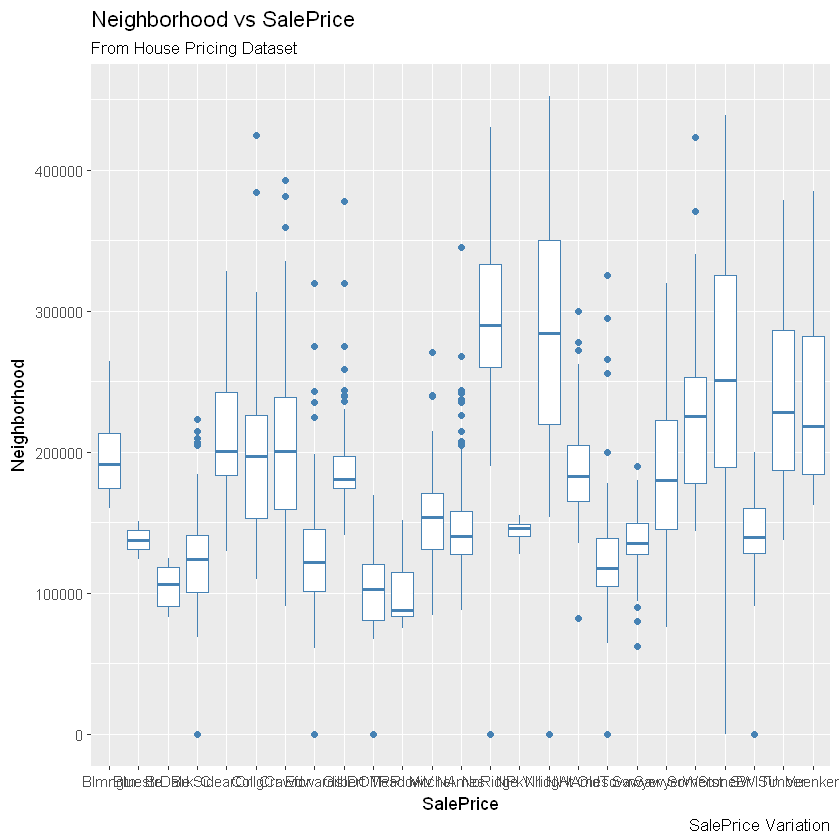

In [62]:
## Working with the Neighborhood factor columns
levels(home_est$Neighborhood)
sum(is.na(home_est$Neighborhood))
table(home_est$Neighborhood)
ggplot(home_est,aes(Neighborhood,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Neighborhood vs SalePrice", subtitle="From House Pricing Dataset", y="Neighborhood", x="SalePrice", caption="SalePrice Variation")

[1] "Artery" "Feedr"  "Norm"   "PosA"   "PosN"   "RRAe"   "RRAn"   "RRNe"  
[9] "RRNn"

[1] 0


Artery  Feedr   Norm   PosA   PosN   RRAe   RRAn   RRNe   RRNn 
    48     81   1260      8     19     11     26      2      5 

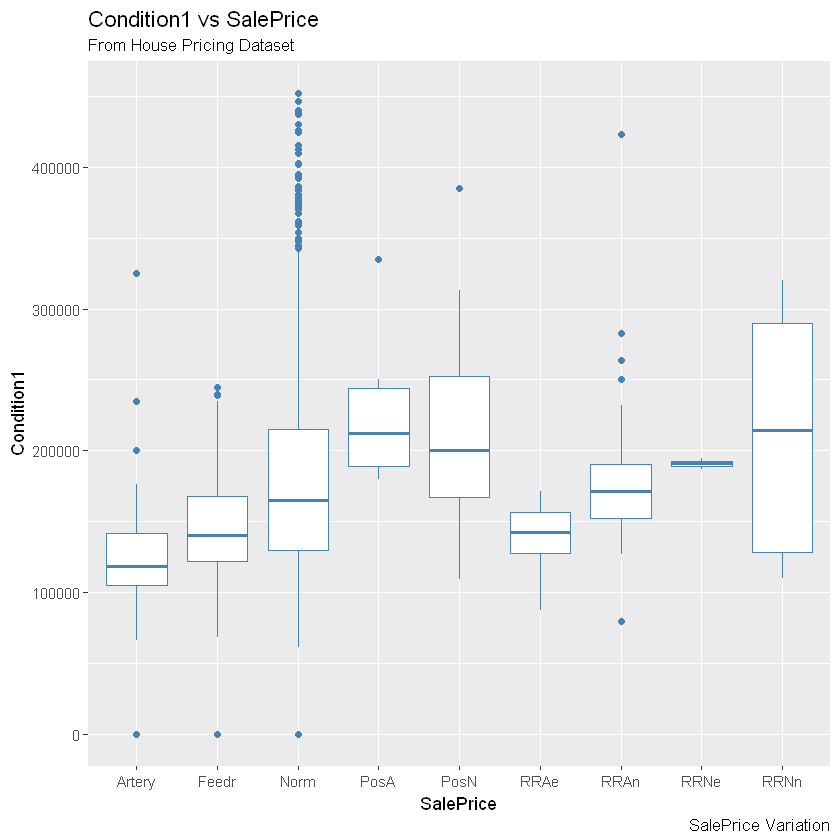

In [63]:
## Working with the Condition1 factor columns
levels(home_est$Condition1)
sum(is.na(home_est$Condition1))
table(home_est$Condition1)
ggplot(home_est,aes(Condition1,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Condition1 vs SalePrice", subtitle="From House Pricing Dataset", y="Condition1", x="SalePrice", caption="SalePrice Variation")

[1] "Artery" "Feedr"  "Norm"   "PosA"   "PosN"   "RRAe"   "RRAn"   "RRNn"

[1] 0


Artery  Feedr   Norm   PosA   PosN   RRAe   RRAn   RRNn 
     2      6   1445      1      2      1      1      2 

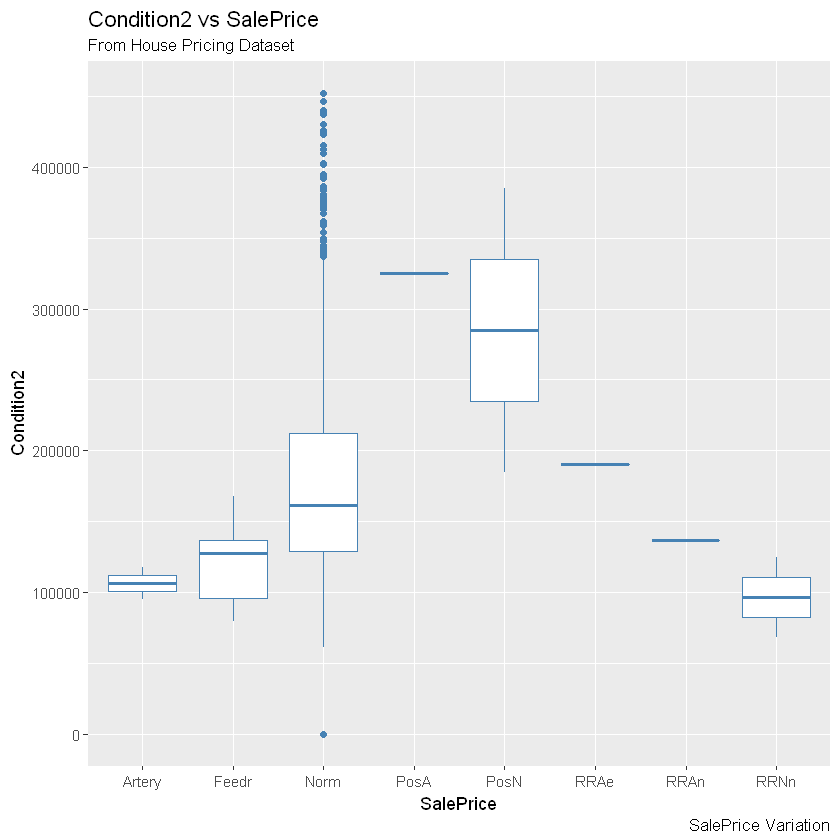

In [64]:
## Working with the Condition1 factor columns
levels(home_est$Condition2)
sum(is.na(home_est$Condition2))
table(home_est$Condition2)
ggplot(home_est,aes(Condition2,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Condition2 vs SalePrice", subtitle="From House Pricing Dataset", y="Condition2", x="SalePrice", caption="SalePrice Variation")

[1] "1Fam"   "2fmCon" "Duplex" "Twnhs"  "TwnhsE"

[1] 0


  1Fam 2fmCon Duplex  Twnhs TwnhsE 
  1220     31     52     43    114 

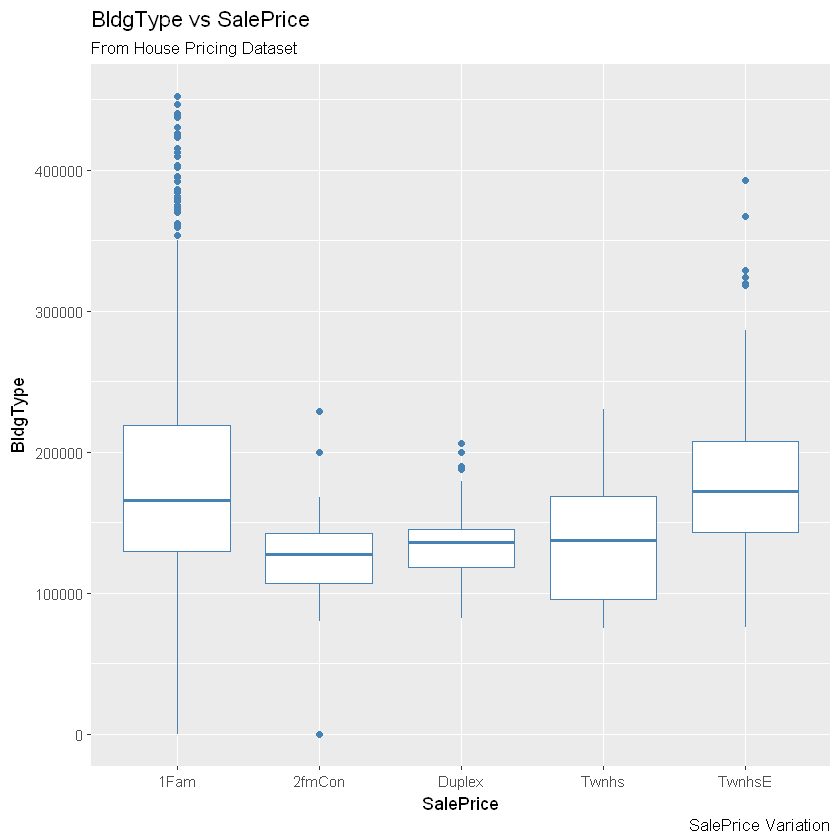

In [65]:
## Working with the Condition1 factor columns
levels(home_est$BldgType)
sum(is.na(home_est$BldgType))
table(home_est$BldgType)
ggplot(home_est,aes(BldgType,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BldgType vs SalePrice", subtitle="From House Pricing Dataset", y="BldgType", x="SalePrice", caption="SalePrice Variation")

[1] "1.5Fin" "1.5Unf" "1Story" "2.5Fin" "2.5Unf" "2Story" "SFoyer" "SLvl"

[1] 0


1.5Fin 1.5Unf 1Story 2.5Fin 2.5Unf 2Story SFoyer   SLvl 
   154     14    726      8     11    445     37     65 

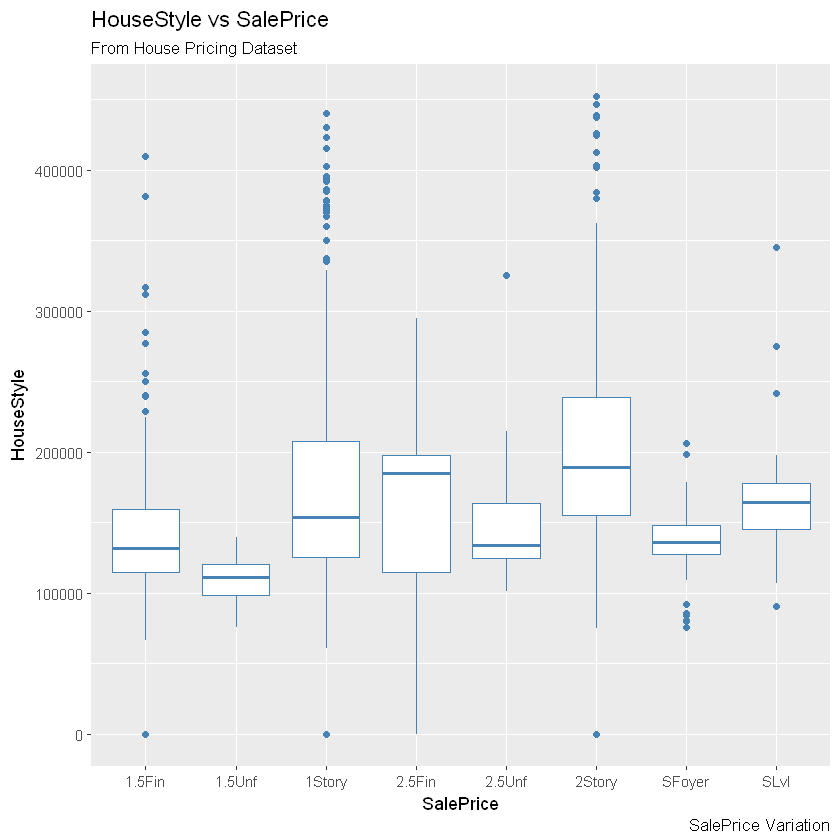

In [66]:
## Working with the HouseStyle factor columns
levels(home_est$HouseStyle)
sum(is.na(home_est$HouseStyle))
table(home_est$HouseStyle)
ggplot(home_est,aes(HouseStyle,SalePrice))+geom_boxplot(col="steelblue")+labs(title="HouseStyle vs SalePrice", subtitle="From House Pricing Dataset", y="HouseStyle", x="SalePrice", caption="SalePrice Variation")

[1] "Flat"    "Gable"   "Gambrel" "Hip"     "Mansard" "Shed"

[1] 0


   Flat   Gable Gambrel     Hip Mansard    Shed 
     13    1141      11     286       7       2 

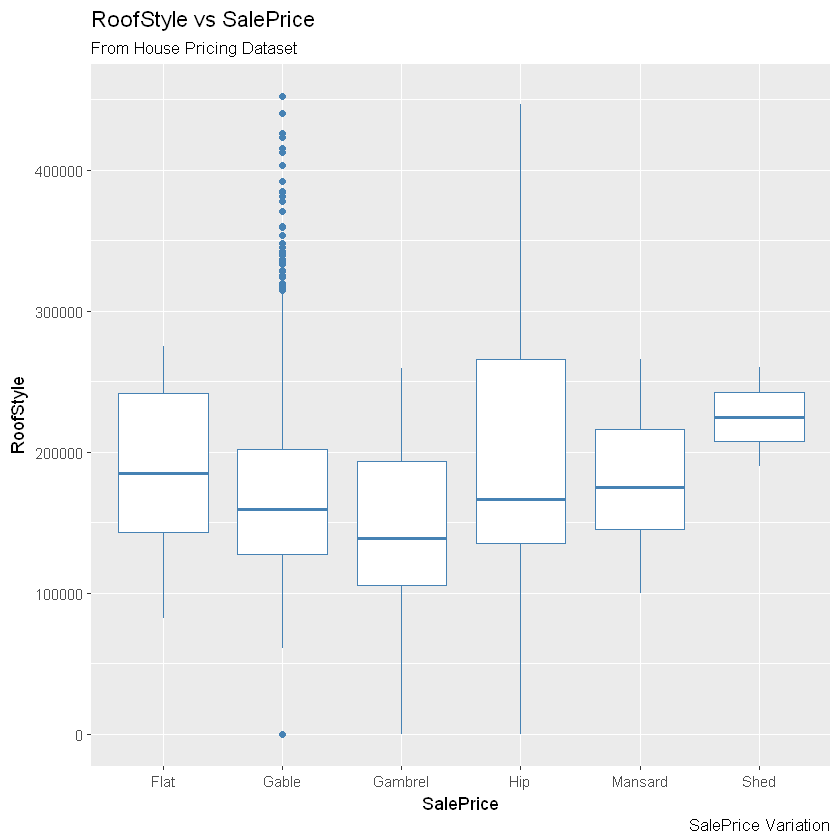

In [67]:
## Working with the RoofStyle factor columns
levels(home_est$RoofStyle)
sum(is.na(home_est$RoofStyle))
table(home_est$RoofStyle)
ggplot(home_est,aes(RoofStyle,SalePrice))+geom_boxplot(col="steelblue")+labs(title="RoofStyle vs SalePrice", subtitle="From House Pricing Dataset", y="RoofStyle", x="SalePrice", caption="SalePrice Variation")

[1] "ClyTile" "CompShg" "Membran" "Metal"   "Roll"    "Tar&Grv" "WdShake"
[8] "WdShngl"

[1] 0


ClyTile CompShg Membran   Metal    Roll Tar&Grv WdShake WdShngl 
      1    1434       1       1       1      11       5       6 

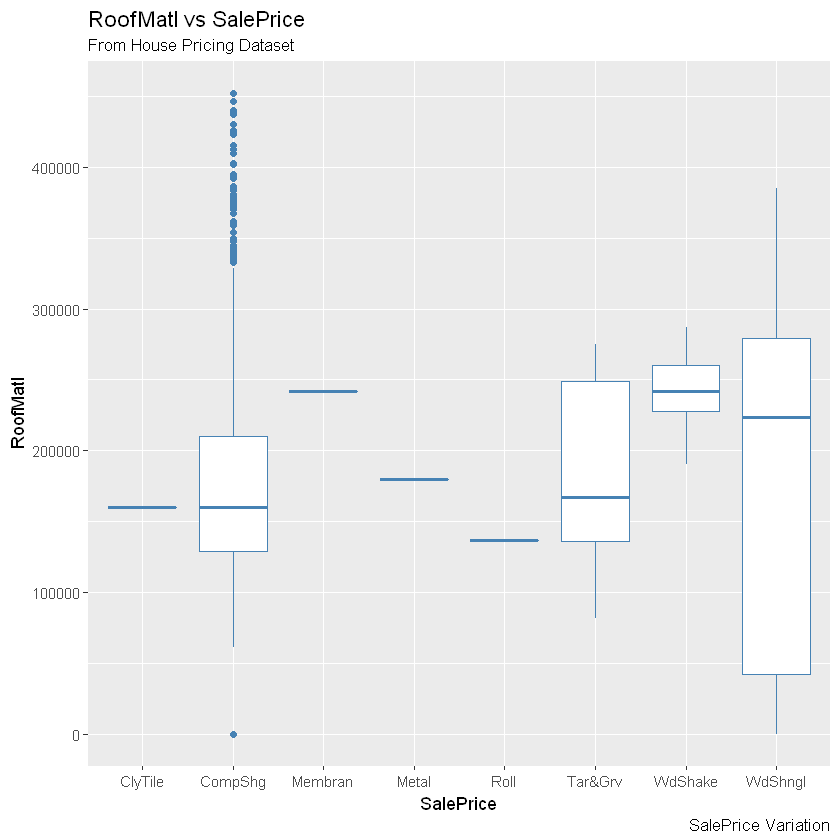

In [68]:
## Working with the RoofMatl factor columns
levels(home_est$RoofMatl)
sum(is.na(home_est$RoofMatl))
table(home_est$RoofMatl)
ggplot(home_est,aes(RoofMatl,SalePrice))+geom_boxplot(col="steelblue")+labs(title="RoofMatl vs SalePrice", subtitle="From House Pricing Dataset", y="RoofMatl", x="SalePrice", caption="SalePrice Variation")

[1] "AsbShng" "AsphShn" "BrkComm" "BrkFace" "CBlock"  "CemntBd" "HdBoard"
 [8] "ImStucc" "MetalSd" "Plywood" "Stone"   "Stucco"  "VinylSd" "Wd Sdng"
[15] "WdShing"

[1] 0


AsbShng AsphShn BrkComm BrkFace  CBlock CemntBd HdBoard ImStucc MetalSd Plywood 
     20       1       2      50       1      61     222       1     220     108 
  Stone  Stucco VinylSd Wd Sdng WdShing 
      2      25     515     206      26 

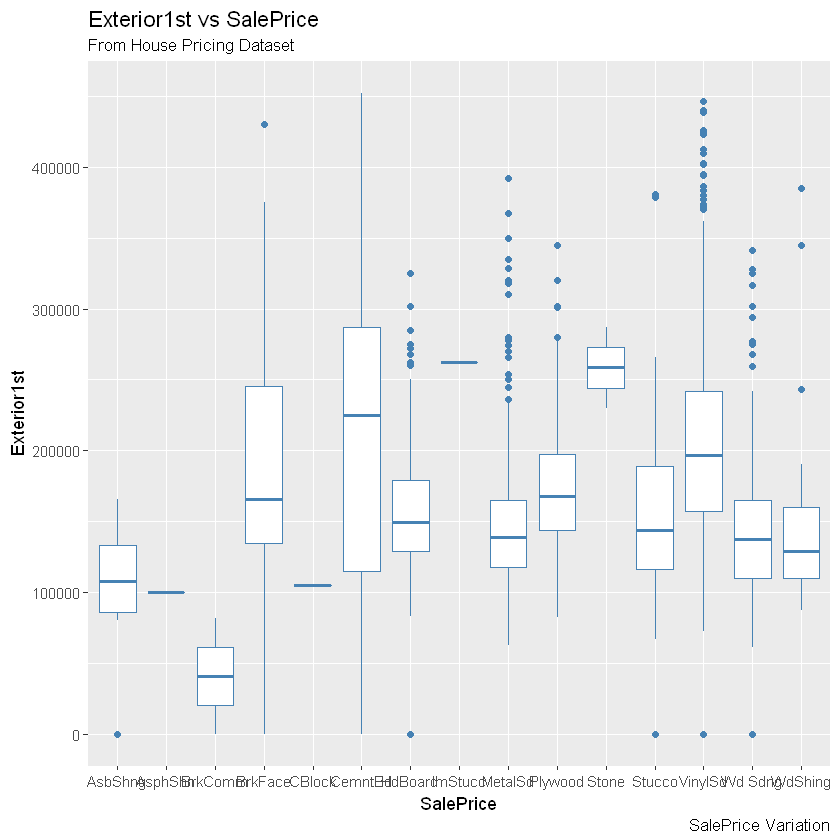

In [69]:
## Working with the Exterior1st factor columns
levels(home_est$Exterior1st)
sum(is.na(home_est$Exterior1st))
table(home_est$Exterior1st)
ggplot(home_est,aes(Exterior1st,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Exterior1st vs SalePrice", subtitle="From House Pricing Dataset", y="Exterior1st", x="SalePrice", caption="SalePrice Variation")

[1] "AsbShng" "AsphShn" "Brk Cmn" "BrkFace" "CBlock"  "CmentBd" "HdBoard"
 [8] "ImStucc" "MetalSd" "Other"   "Plywood" "Stone"   "Stucco"  "VinylSd"
[15] "Wd Sdng" "Wd Shng"

[1] 0


AsbShng AsphShn Brk Cmn BrkFace  CBlock CmentBd HdBoard ImStucc MetalSd   Other 
     20       3       7      25       1      60     207      10     214       1 
Plywood   Stone  Stucco VinylSd Wd Sdng Wd Shng 
    142       5      26     504     197      38 

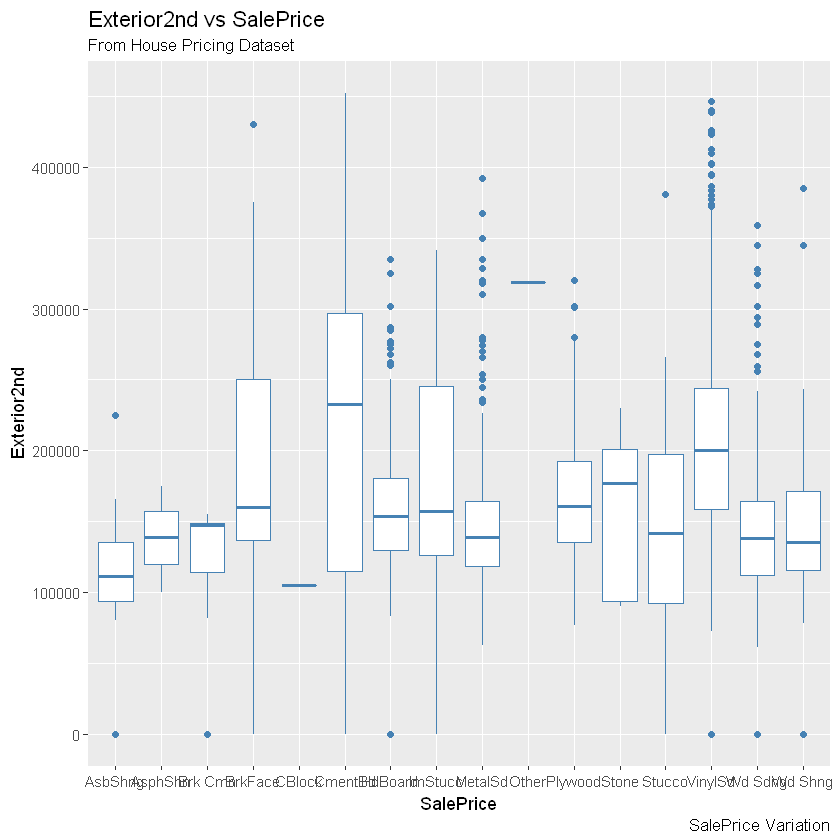

In [70]:
## Working with the Exterior1st factor columns
levels(home_est$Exterior2nd)
sum(is.na(home_est$Exterior2nd))
table(home_est$Exterior2nd)
ggplot(home_est,aes(Exterior2nd,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Exterior2nd vs SalePrice", subtitle="From House Pricing Dataset", y="Exterior2nd", x="SalePrice", caption="SalePrice Variation")

[1] "BrkCmn"  "BrkFace" "None"    "Stone"

[1] 8


 BrkCmn BrkFace    None   Stone 
     15     445     864     128 

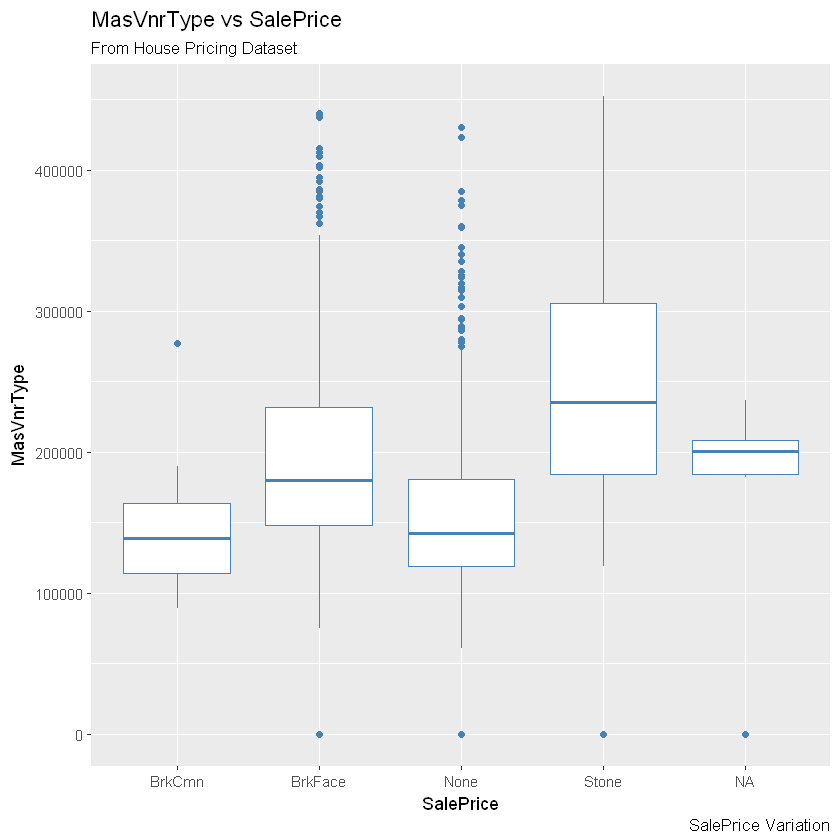

In [71]:
## Working with the MasVnrType factor columns
levels(home_est$MasVnrType)
sum(is.na(home_est$MasVnrType))
table(home_est$MasVnrType)
ggplot(home_est,aes(MasVnrType,SalePrice))+geom_boxplot(col="steelblue")+labs(title="MasVnrType vs SalePrice", subtitle="From House Pricing Dataset", y="MasVnrType", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "TA"

[1] 0


 Ex  Fa  Gd  TA 
 52  14 488 906 

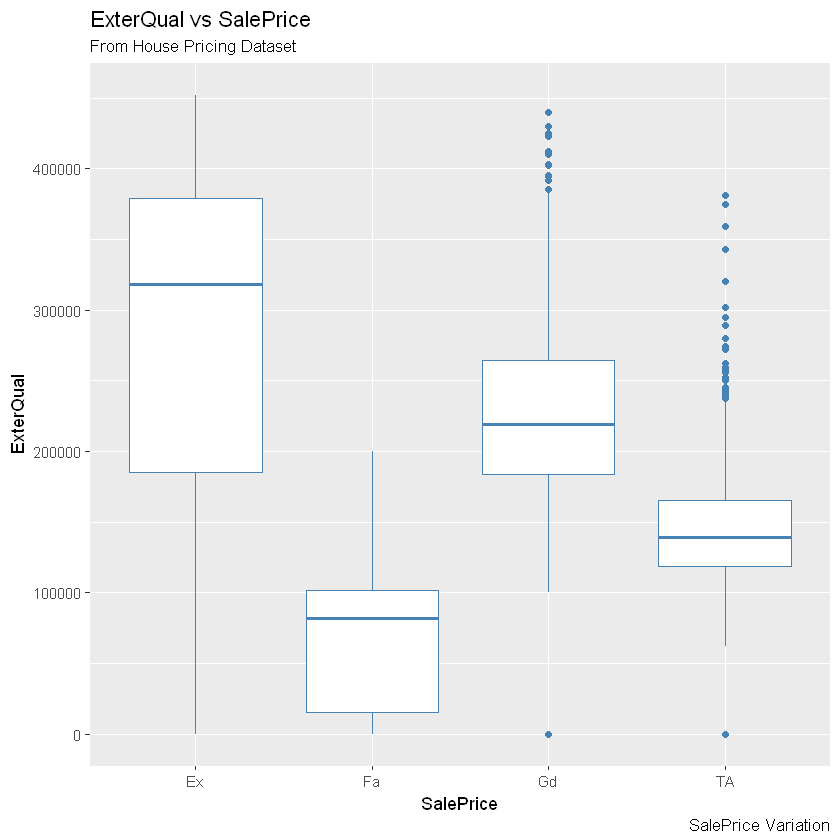

In [72]:
## Working with the ExterQual factor columns
levels(home_est$ExterQual)
sum(is.na(home_est$ExterQual))
table(home_est$ExterQual)
ggplot(home_est,aes(ExterQual,SalePrice))+geom_boxplot(col="steelblue")+labs(title="ExterQual vs SalePrice", subtitle="From House Pricing Dataset", y="ExterQual", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "Po" "TA"

[1] 0


  Ex   Fa   Gd   Po   TA 
   3   28  146    1 1282 

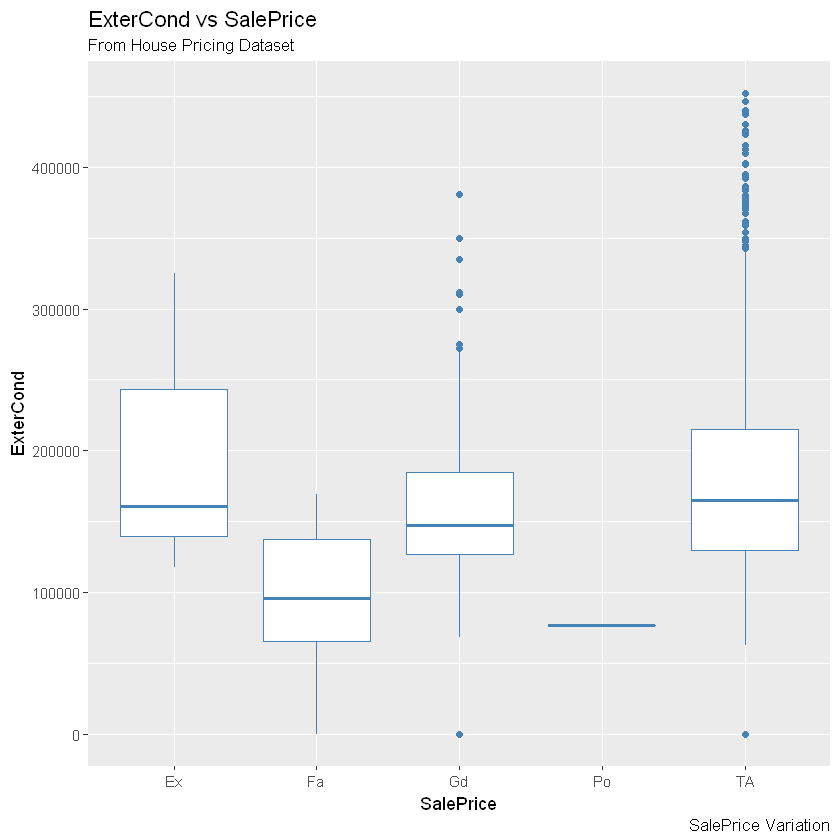

In [73]:
## Working with the ExterCond factor columns
levels(home_est$ExterCond)
sum(is.na(home_est$ExterCond))
table(home_est$ExterCond)
ggplot(home_est,aes(ExterCond,SalePrice))+geom_boxplot(col="steelblue")+labs(title="ExterCond vs SalePrice", subtitle="From House Pricing Dataset", y="ExterCond", x="SalePrice", caption="SalePrice Variation")

[1] "BrkTil" "CBlock" "PConc"  "Slab"   "Stone"  "Wood"

[1] 0


BrkTil CBlock  PConc   Slab  Stone   Wood 
   146    634    647     24      6      3 

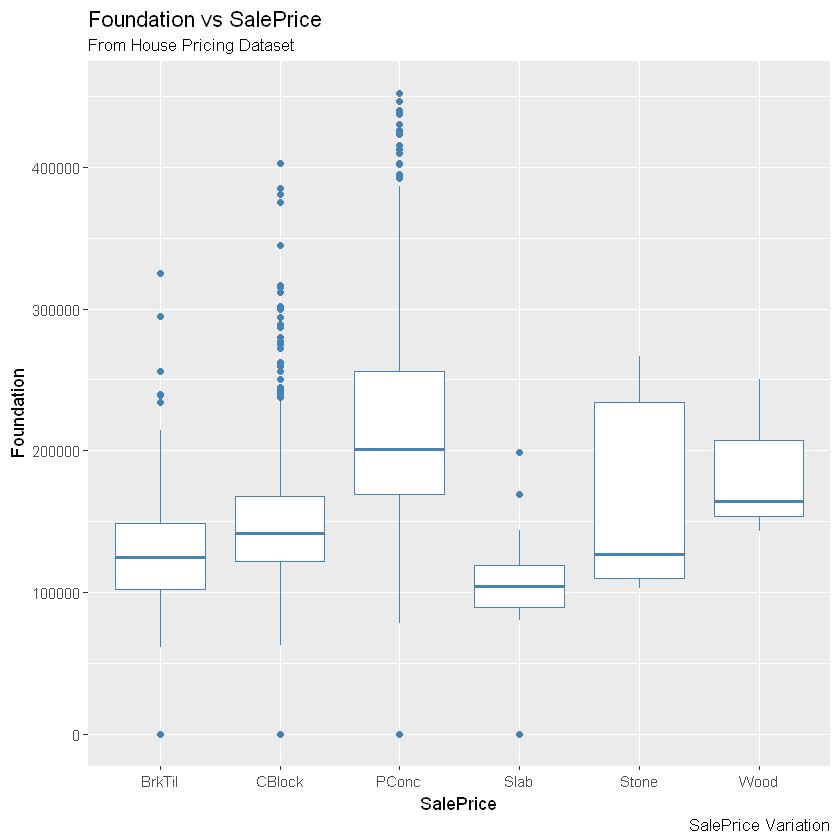

In [74]:
## Working with the Foundation factor columns
levels(home_est$Foundation)
sum(is.na(home_est$Foundation))
table(home_est$Foundation)
ggplot(home_est,aes(Foundation,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Foundation vs SalePrice", subtitle="From House Pricing Dataset", y="Foundation", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "TA"

[1] 37


 Ex  Fa  Gd  TA 
121  35 618 649 

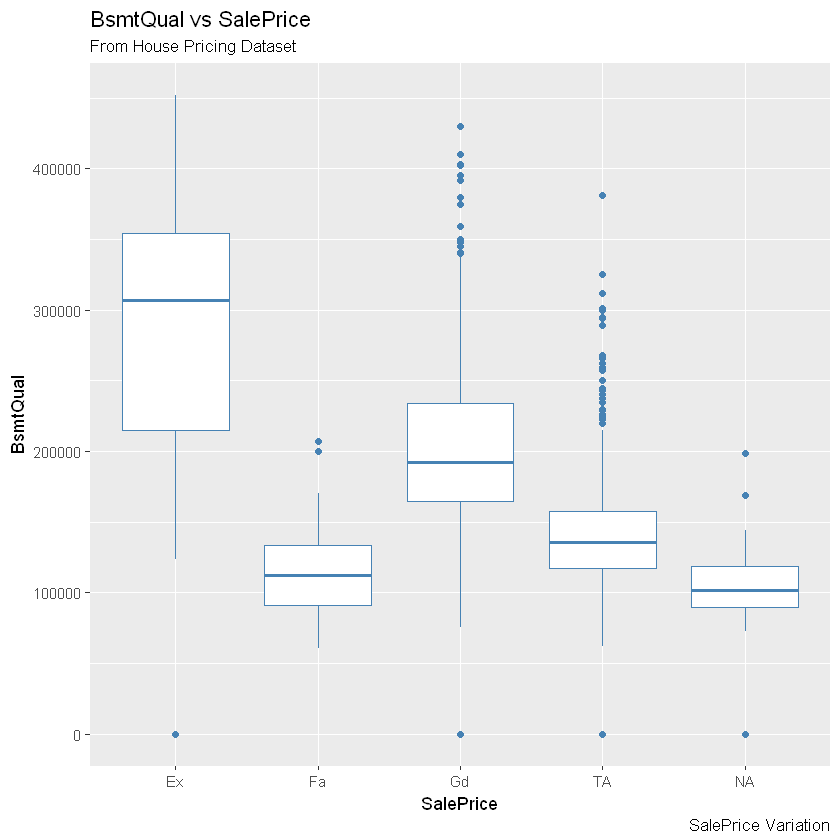

In [75]:
## Working with the BsmtQual factor columns
levels(home_est$BsmtQual)
sum(is.na(home_est$BsmtQual))
table(home_est$BsmtQual)
ggplot(home_est,aes(BsmtQual,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BsmtQual vs SalePrice", subtitle="From House Pricing Dataset", y="BsmtQual", x="SalePrice", caption="SalePrice Variation")

[1] "Fa" "Gd" "Po" "TA"

[1] 37


  Fa   Gd   Po   TA 
  45   65    2 1311 

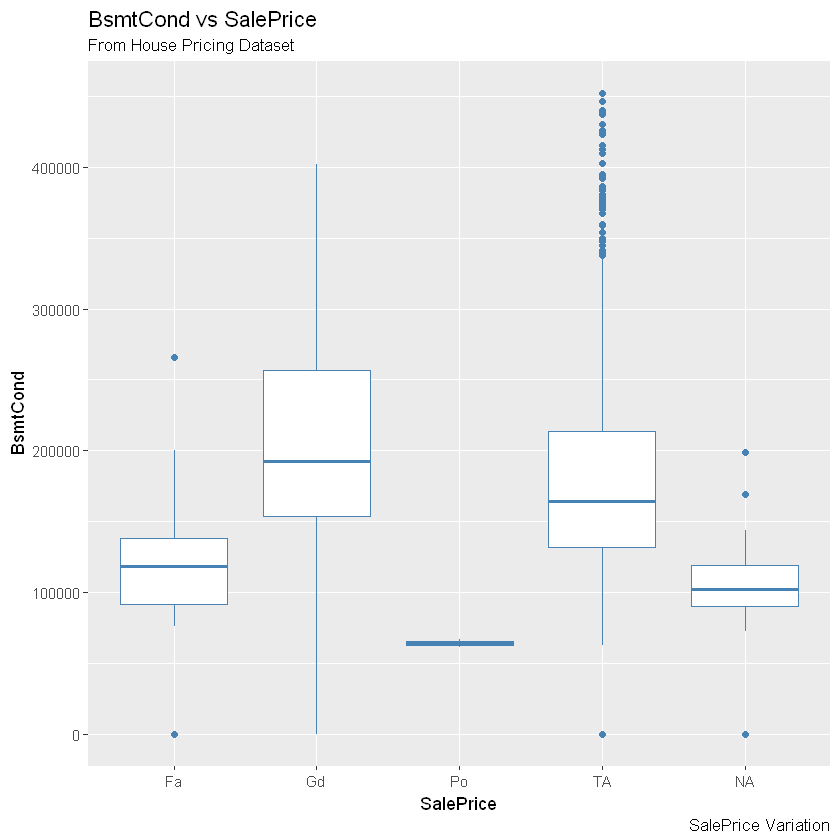

In [76]:
## Working with the BsmtCond factor columns
levels(home_est$BsmtCond)
sum(is.na(home_est$BsmtCond))
table(home_est$BsmtCond)
ggplot(home_est,aes(BsmtCond,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BsmtCond vs SalePrice", subtitle="From House Pricing Dataset", y="BsmtCond", x="SalePrice", caption="SalePrice Variation")

[1] "Av" "Gd" "Mn" "No"

[1] 38


 Av  Gd  Mn  No 
221 134 114 953 

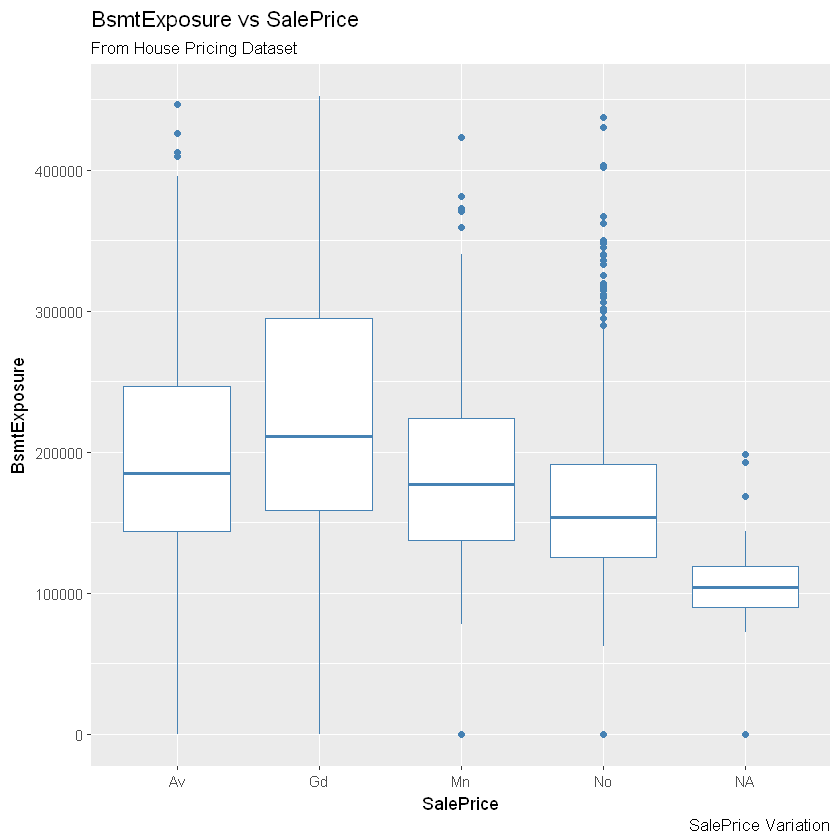

In [77]:
## Working with the BsmtExposure factor columns
levels(home_est$BsmtExposure)
sum(is.na(home_est$BsmtExposure))
table(home_est$BsmtExposure)
ggplot(home_est,aes(BsmtExposure,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BsmtExposure vs SalePrice", subtitle="From House Pricing Dataset", y="BsmtExposure", x="SalePrice", caption="SalePrice Variation")

[1] "ALQ" "BLQ" "GLQ" "LwQ" "Rec" "Unf"

[1] 37


ALQ BLQ GLQ LwQ Rec Unf 
220 148 418  74 133 430 

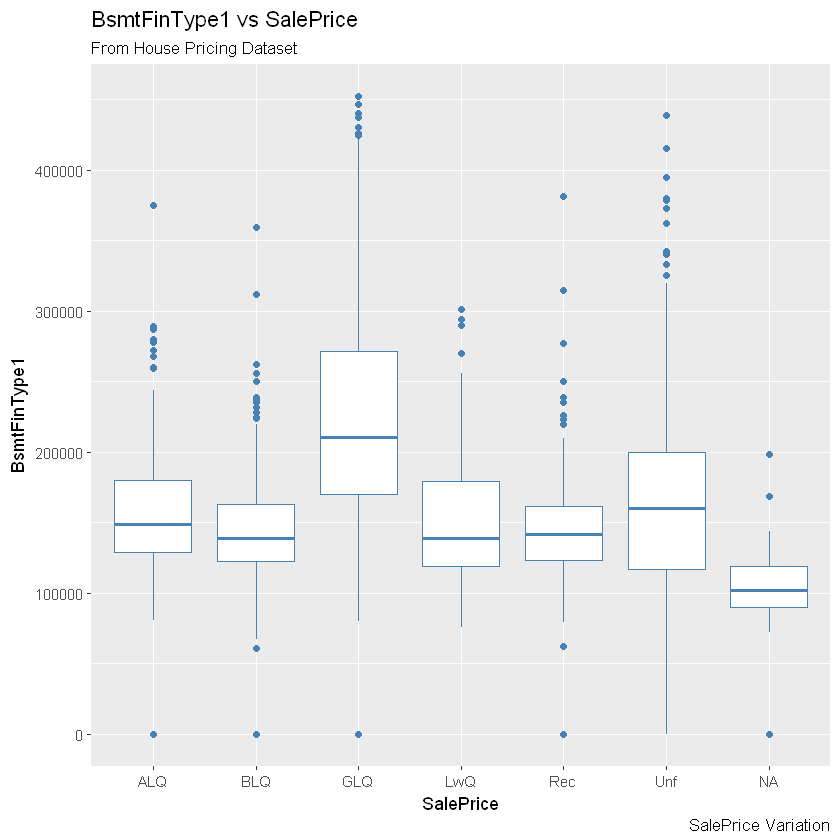

In [78]:
## Working with the BsmtFinType1 factor columns
levels(home_est$BsmtFinType1)
sum(is.na(home_est$BsmtFinType1))
table(home_est$BsmtFinType1)
ggplot(home_est,aes(BsmtFinType1,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BsmtFinType1 vs SalePrice", subtitle="From House Pricing Dataset", y="BsmtFinType1", x="SalePrice", caption="SalePrice Variation")

[1] "ALQ" "BLQ" "GLQ" "LwQ" "Rec" "Unf"

[1] 38


 ALQ  BLQ  GLQ  LwQ  Rec  Unf 
  19   33   14   46   54 1256 

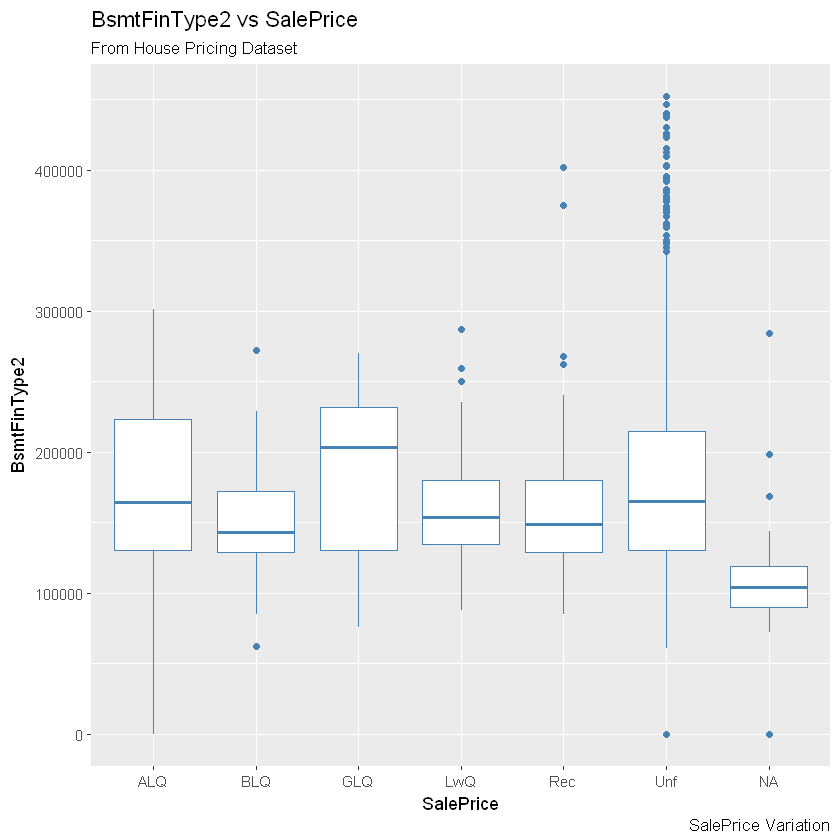

In [79]:
## Working with the BsmtFinType2 factor columns
levels(home_est$BsmtFinType2)
sum(is.na(home_est$BsmtFinType2))
table(home_est$BsmtFinType2)
ggplot(home_est,aes(BsmtFinType2,SalePrice))+geom_boxplot(col="steelblue")+labs(title="BsmtFinType2 vs SalePrice", subtitle="From House Pricing Dataset", y="BsmtFinType2", x="SalePrice", caption="SalePrice Variation")

[1] "Floor" "GasA"  "GasW"  "Grav"  "OthW"  "Wall"

[1] 0


Floor  GasA  GasW  Grav  OthW  Wall 
    1  1428    18     7     2     4 

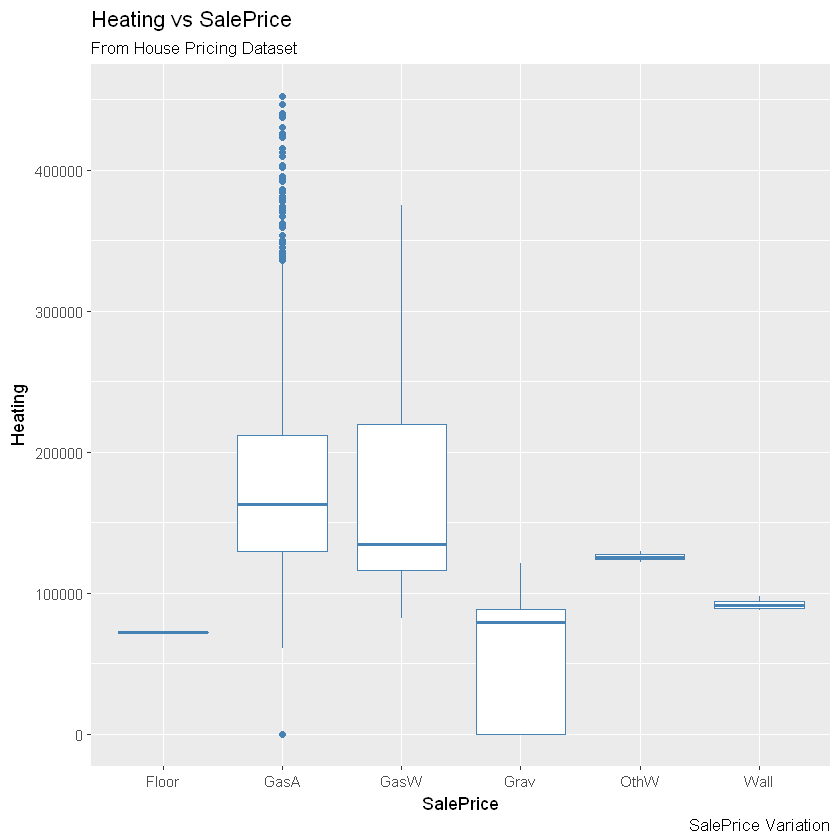

In [80]:
## Working with the Heating factor columns
levels(home_est$Heating)
sum(is.na(home_est$Heating))
table(home_est$Heating)
ggplot(home_est,aes(Heating,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Heating vs SalePrice", subtitle="From House Pricing Dataset", y="Heating", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "Po" "TA"

[1] 0


 Ex  Fa  Gd  Po  TA 
741  49 241   1 428 

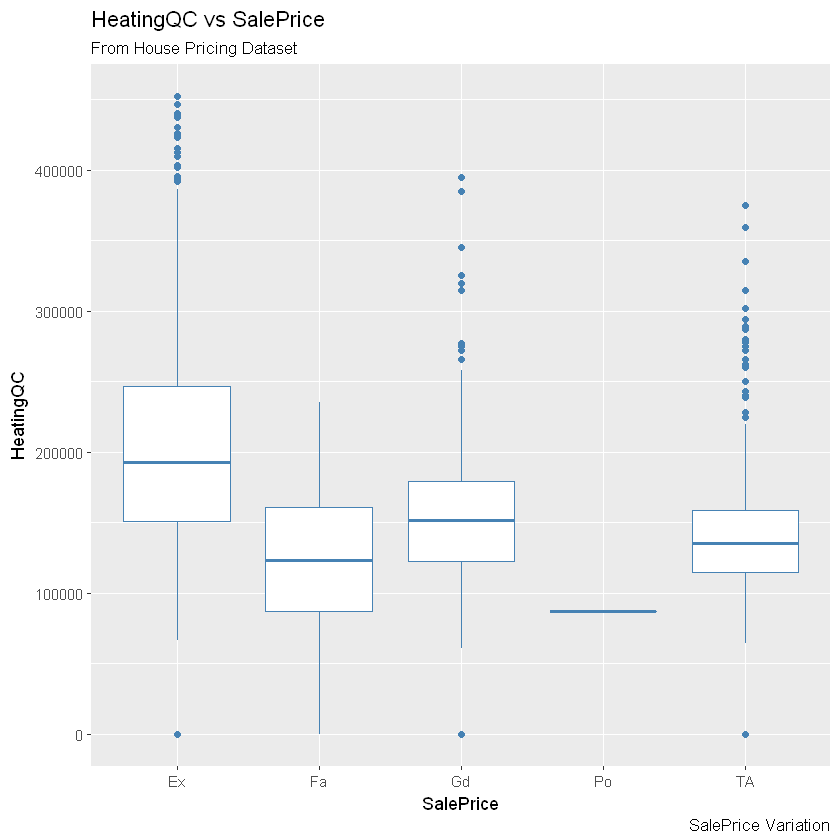

In [81]:
## Working with the HeatingQC factor columns
levels(home_est$HeatingQC)
sum(is.na(home_est$HeatingQC))
table(home_est$HeatingQC)
ggplot(home_est,aes(HeatingQC,SalePrice))+geom_boxplot(col="steelblue")+labs(title="HeatingQC vs SalePrice", subtitle="From House Pricing Dataset", y="HeatingQC", x="SalePrice", caption="SalePrice Variation")

[1] "N" "Y"

[1] 0


   N    Y 
  95 1365 

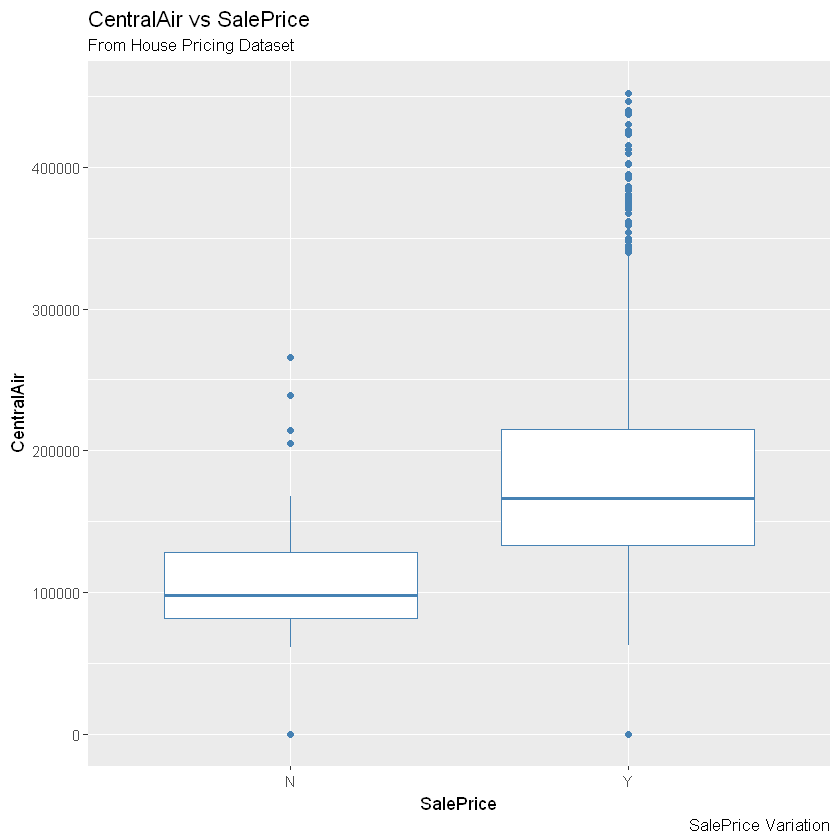

In [82]:
## Working with the CentralAir factor columns
levels(home_est$CentralAir)
sum(is.na(home_est$CentralAir))
table(home_est$CentralAir)
ggplot(home_est,aes(CentralAir,SalePrice))+geom_boxplot(col="steelblue")+labs(title="CentralAir vs SalePrice", subtitle="From House Pricing Dataset", y="CentralAir", x="SalePrice", caption="SalePrice Variation")

[1] "FuseA" "FuseF" "FuseP" "Mix"   "SBrkr"

[1] 1


FuseA FuseF FuseP   Mix SBrkr 
   94    27     3     1  1334 

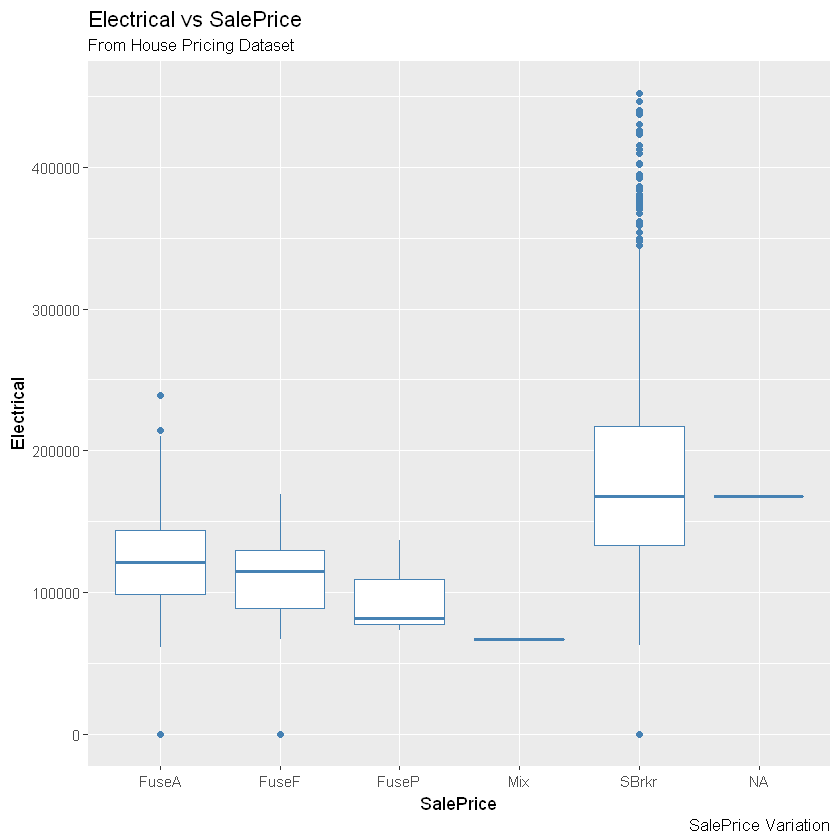

In [83]:
## Working with the Electrical factor columns
levels(home_est$Electrical)
sum(is.na(home_est$Electrical))
table(home_est$Electrical)
ggplot(home_est,aes(Electrical,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Electrical vs SalePrice", subtitle="From House Pricing Dataset", y="Electrical", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "TA"

[1] 0


 Ex  Fa  Gd  TA 
100  39 586 735 

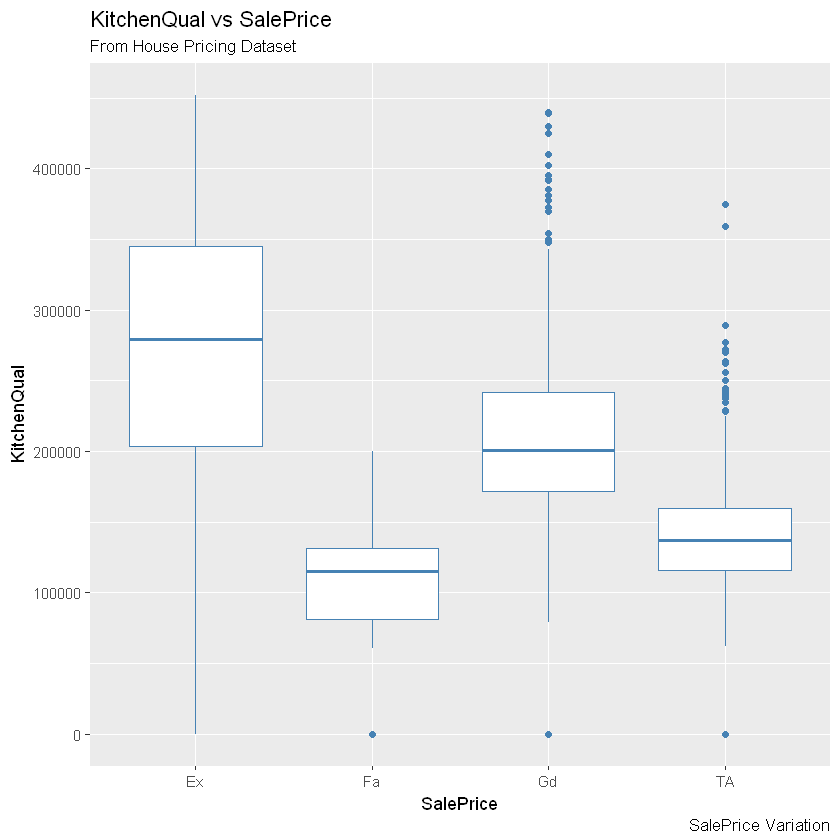

In [84]:
## Working with the KitchenQual factor columns
levels(home_est$KitchenQual)
sum(is.na(home_est$KitchenQual))
table(home_est$KitchenQual)
ggplot(home_est,aes(KitchenQual,SalePrice))+geom_boxplot(col="steelblue")+labs(title="KitchenQual vs SalePrice", subtitle="From House Pricing Dataset", y="KitchenQual", x="SalePrice", caption="SalePrice Variation")

[1] "Maj1" "Maj2" "Min1" "Min2" "Mod"  "Sev"  "Typ"

[1] 0


Maj1 Maj2 Min1 Min2  Mod  Sev  Typ 
  14    5   31   34   15    1 1360 

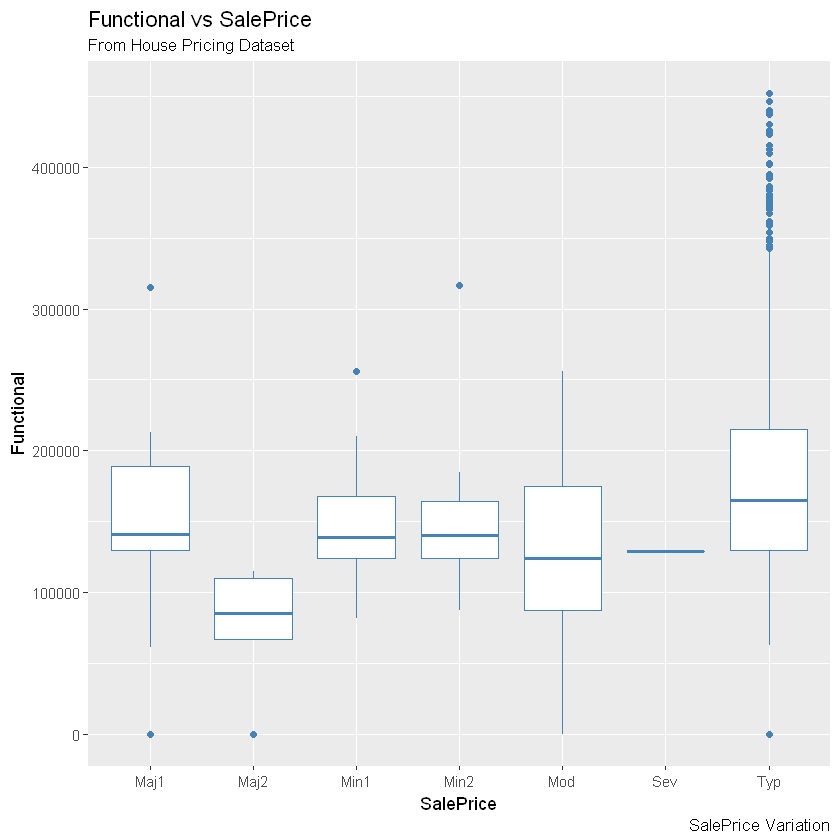

In [86]:
## Working with the Functional factor columns
levels(home_est$Functional)
sum(is.na(home_est$Functional))
table(home_est$Functional)
ggplot(home_est,aes(Functional,SalePrice))+geom_boxplot(col="steelblue")+labs(title="Functional vs SalePrice", subtitle="From House Pricing Dataset", y="Functional", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "Po" "TA"

[1] 690


 Ex  Fa  Gd  Po  TA 
 24  33 380  20 313 

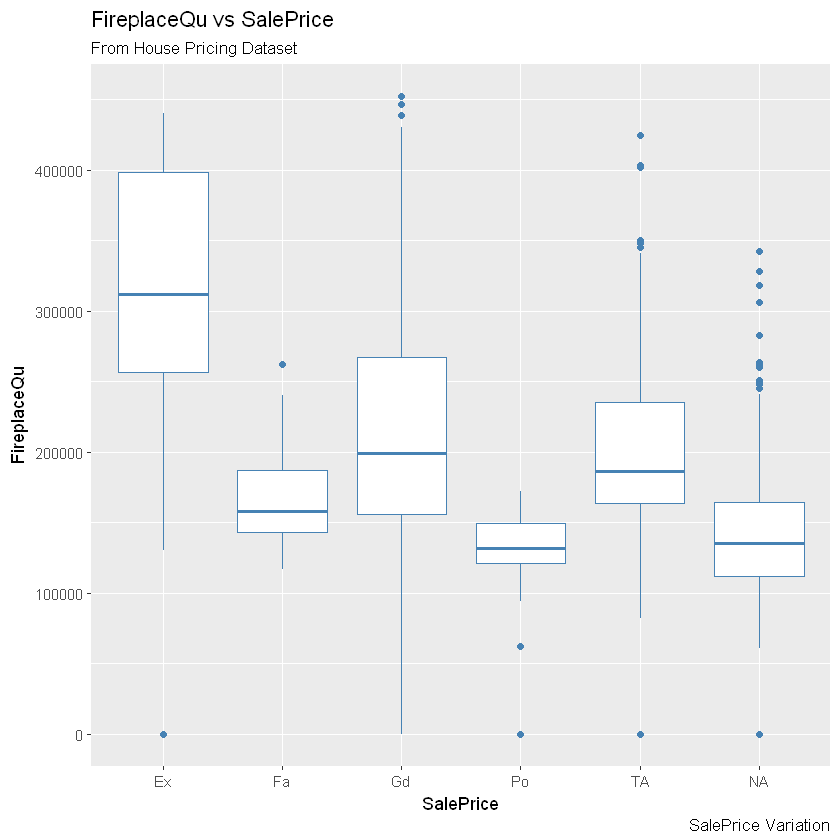

In [85]:
## Working with the FireplaceQu factor columns
levels(home_est$FireplaceQu)
sum(is.na(home_est$FireplaceQu))
table(home_est$FireplaceQu)
ggplot(home_est,aes(FireplaceQu,SalePrice))+geom_boxplot(col="steelblue")+labs(title="FireplaceQu vs SalePrice", subtitle="From House Pricing Dataset", y="FireplaceQu", x="SalePrice", caption="SalePrice Variation")

In [ ]:
## Working with the FireplaceQu factor columns
levels(home_est$FireplaceQu)
sum(is.na(home_est$FireplaceQu))
table(home_est$FireplaceQu)
ggplot(home_est,aes(FireplaceQu,SalePrice))+geom_boxplot(col="steelblue")+labs(title="FireplaceQu vs SalePrice", subtitle="From House Pricing Dataset", y="FireplaceQu", x="SalePrice", caption="SalePrice Variation")

[1] "2Types"  "Attchd"  "Basment" "BuiltIn" "CarPort" "Detchd"

[1] 81


 2Types  Attchd Basment BuiltIn CarPort  Detchd 
      6     870      19      88       9     387 

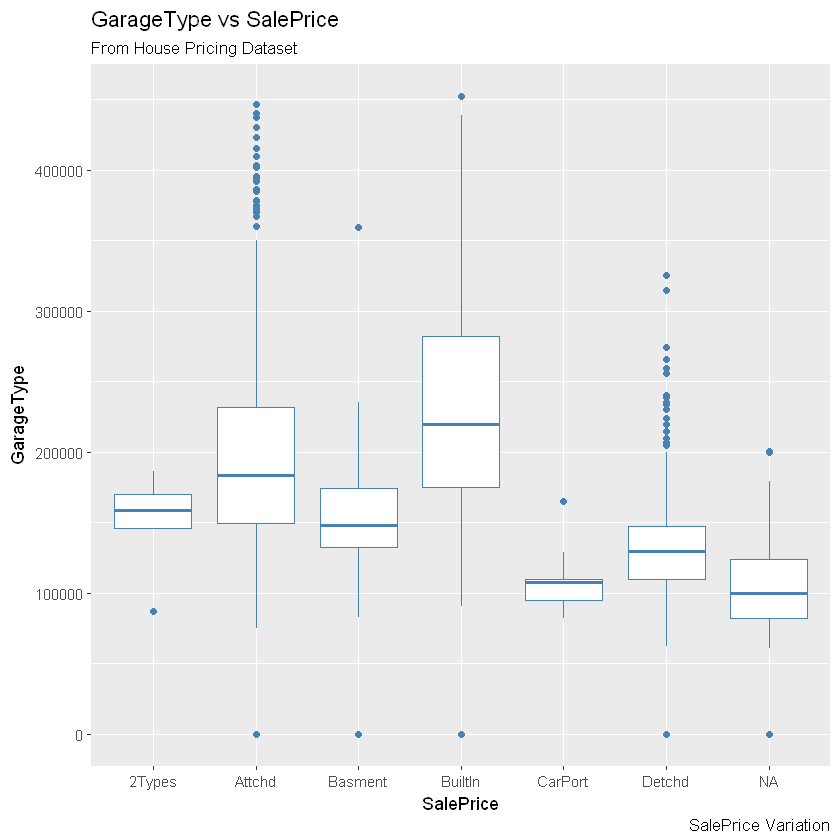

In [87]:
## Working with the GarageType factor columns
levels(home_est$GarageType)
sum(is.na(home_est$GarageType))
table(home_est$GarageType)
ggplot(home_est,aes(GarageType,SalePrice))+geom_boxplot(col="steelblue")+labs(title="GarageType vs SalePrice", subtitle="From House Pricing Dataset", y="GarageType", x="SalePrice", caption="SalePrice Variation")

[1] "Fin" "RFn" "Unf"

[1] 81


Fin RFn Unf 
352 422 605 

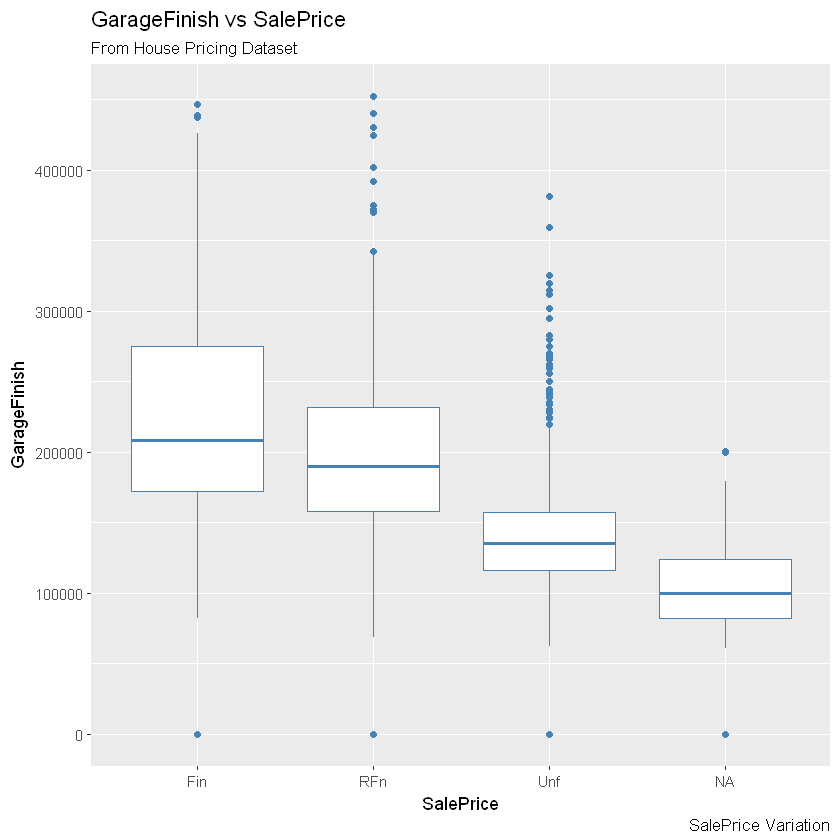

In [88]:
## Working with the GarageFinish factor columns
levels(home_est$GarageFinish)
sum(is.na(home_est$GarageFinish))
table(home_est$GarageFinish)
ggplot(home_est,aes(GarageFinish,SalePrice))+geom_boxplot(col="steelblue")+labs(title="GarageFinish vs SalePrice", subtitle="From House Pricing Dataset", y="GarageFinish", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "Po" "TA"

[1] 81


  Ex   Fa   Gd   Po   TA 
   3   48   14    3 1311 

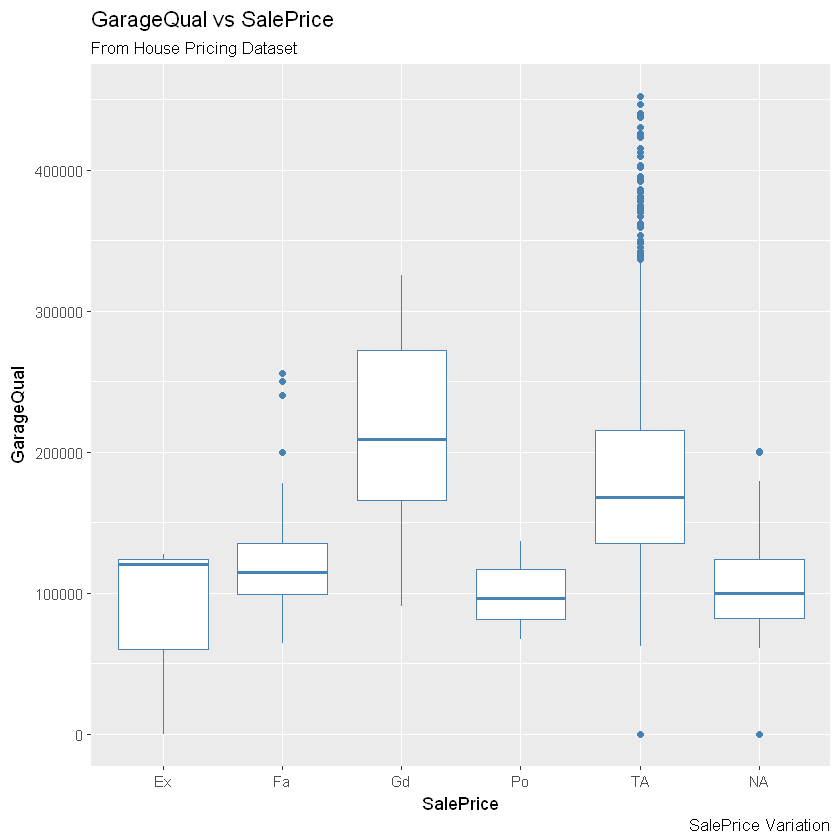

In [89]:
## Working with the GarageQual factor columns
levels(home_est$GarageQual)
sum(is.na(home_est$GarageQual))
table(home_est$GarageQual)
ggplot(home_est,aes(GarageQual,SalePrice))+geom_boxplot(col="steelblue")+labs(title="GarageQual vs SalePrice", subtitle="From House Pricing Dataset", y="GarageQual", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd" "Po" "TA"

[1] 81


  Ex   Fa   Gd   Po   TA 
   2   35    9    7 1326 

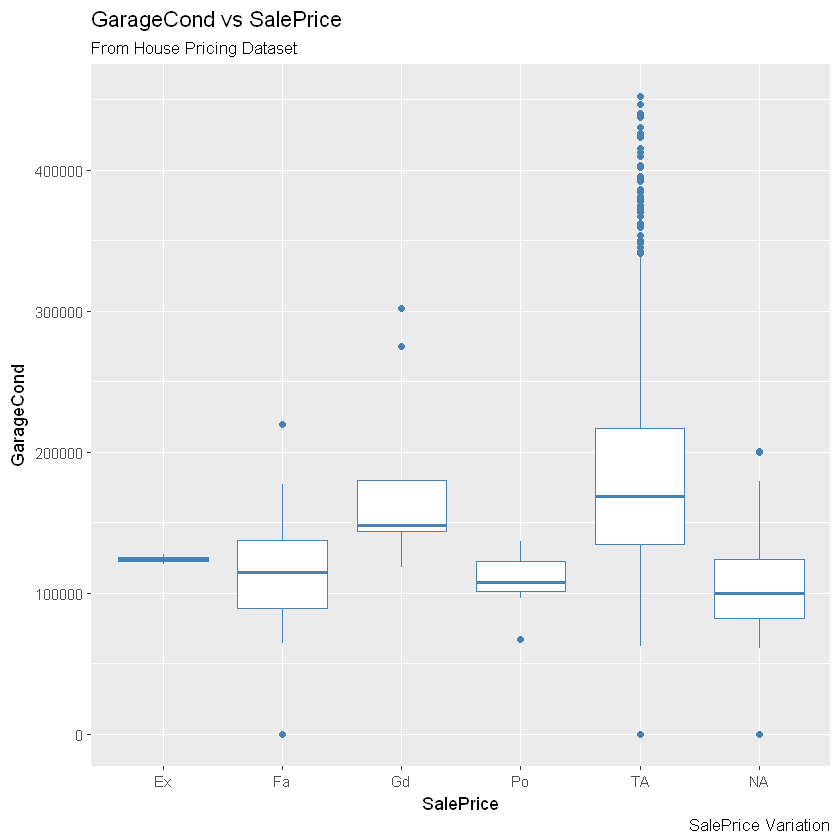

In [90]:
## Working with the GarageCond factor columns
levels(home_est$GarageCond)
sum(is.na(home_est$GarageCond))
table(home_est$GarageCond)
ggplot(home_est,aes(GarageCond,SalePrice))+geom_boxplot(col="steelblue")+labs(title="GarageCond vs SalePrice", subtitle="From House Pricing Dataset", y="GarageCond", x="SalePrice", caption="SalePrice Variation")

[1] "N" "P" "Y"

[1] 0


   N    P    Y 
  90   30 1340 

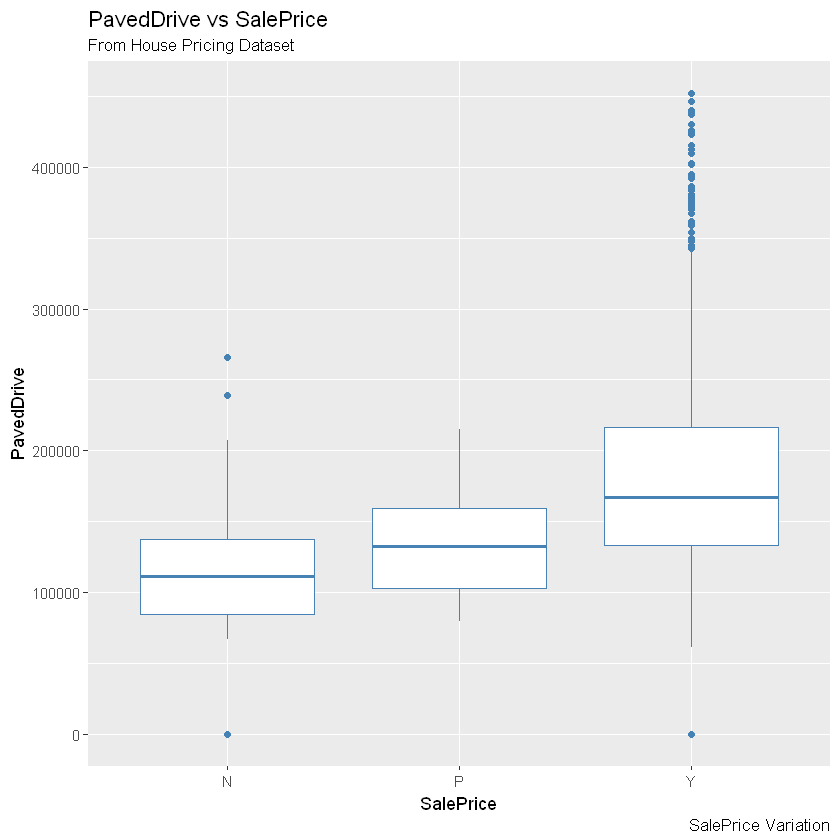

In [91]:
## Working with the PavedDrive factor columns
levels(home_est$PavedDrive)
sum(is.na(home_est$PavedDrive))
table(home_est$PavedDrive)
ggplot(home_est,aes(PavedDrive,SalePrice))+geom_boxplot(col="steelblue")+labs(title="PavedDrive vs SalePrice", subtitle="From House Pricing Dataset", y="PavedDrive", x="SalePrice", caption="SalePrice Variation")

[1] "Ex" "Fa" "Gd"

[1] 1453


Ex Fa Gd 
 2  2  3 

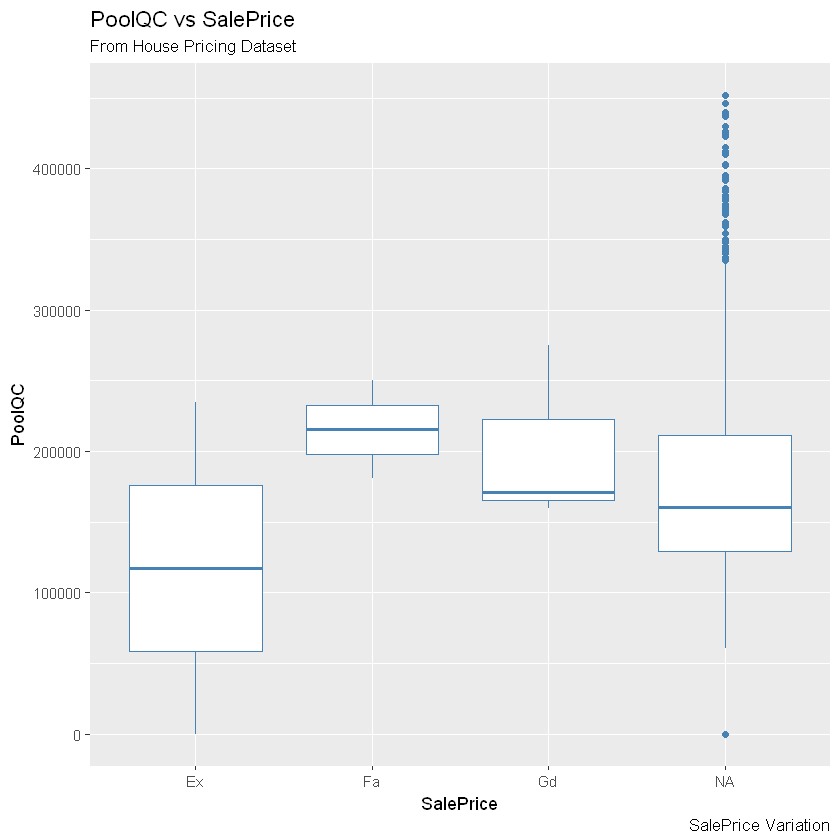

In [92]:
## Working with the PoolQC factor columns
levels(home_est$PoolQC)
sum(is.na(home_est$PoolQC))
table(home_est$PoolQC)
ggplot(home_est,aes(PoolQC,SalePrice))+geom_boxplot(col="steelblue")+labs(title="PoolQC vs SalePrice", subtitle="From House Pricing Dataset", y="PoolQC", x="SalePrice", caption="SalePrice Variation")

[1] "Gar2" "Othr" "Shed" "TenC"

[1] 1406


Gar2 Othr Shed TenC 
   2    2   49    1 

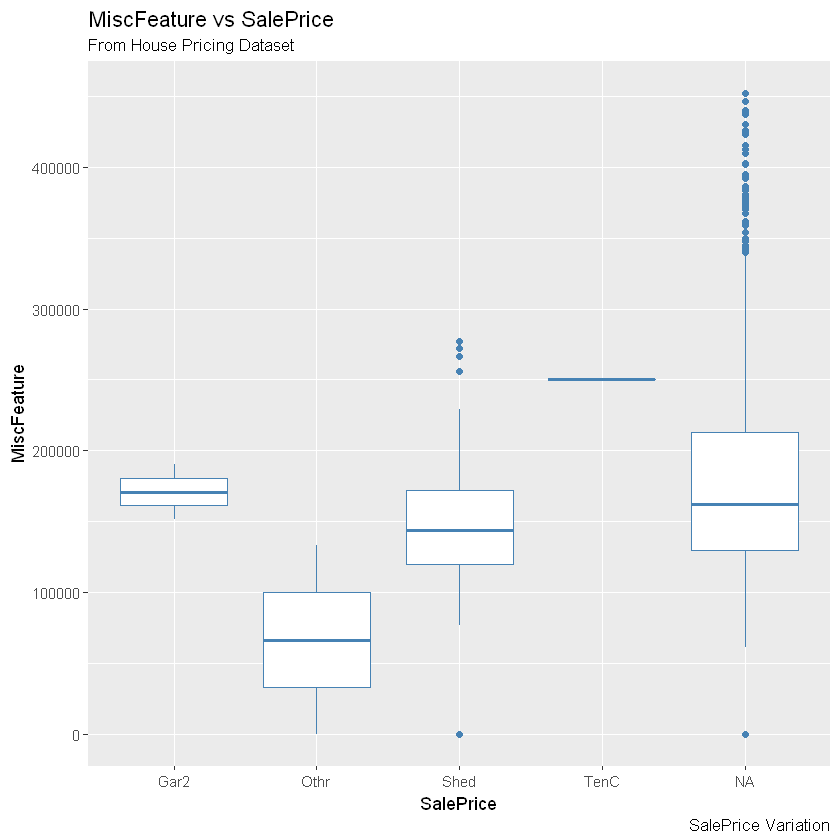

In [93]:
## Working with the MiscFeature factor columns
levels(home_est$MiscFeature)
sum(is.na(home_est$MiscFeature))
table(home_est$MiscFeature)
ggplot(home_est,aes(MiscFeature,SalePrice))+geom_boxplot(col="steelblue")+labs(title="MiscFeature vs SalePrice", subtitle="From House Pricing Dataset", y="MiscFeature", x="SalePrice", caption="SalePrice Variation")

[1] "COD"   "Con"   "ConLD" "ConLI" "ConLw" "CWD"   "New"   "Oth"   "WD"

[1] 0


  COD   Con ConLD ConLI ConLw   CWD   New   Oth    WD 
   43     2     9     5     5     4   122     3  1267 

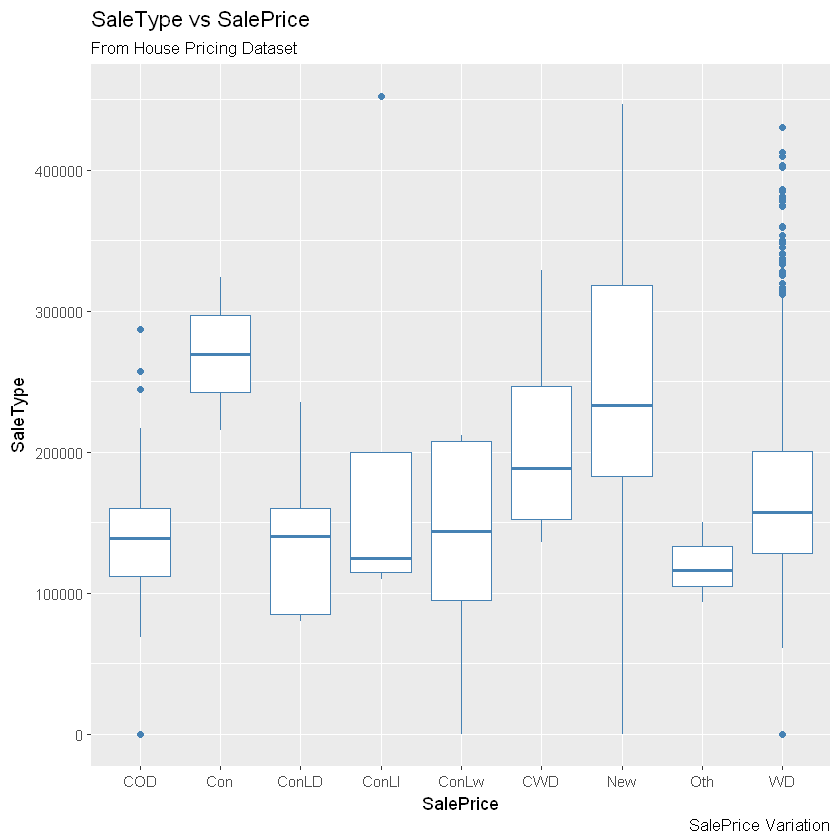

In [94]:
## Working with the SaleType factor columns
levels(home_est$SaleType)
sum(is.na(home_est$SaleType))
table(home_est$SaleType)
ggplot(home_est,aes(SaleType,SalePrice))+geom_boxplot(col="steelblue")+labs(title="SaleType vs SalePrice", subtitle="From House Pricing Dataset", y="SaleType", x="SalePrice", caption="SalePrice Variation")

[1] "Abnorml" "AdjLand" "Alloca"  "Family"  "Normal"  "Partial"

[1] 0


Abnorml AdjLand  Alloca  Family  Normal Partial 
    101       4      12      20    1198     125 

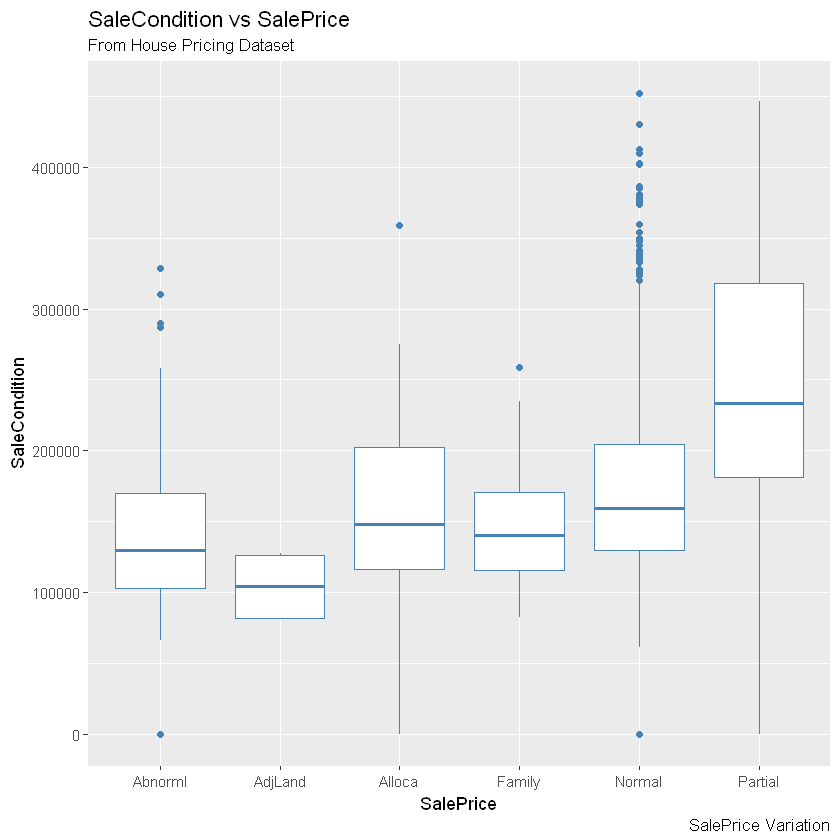

In [95]:
## Working with the SaleCondition factor columns
levels(home_est$SaleCondition)
sum(is.na(home_est$SaleCondition))
table(home_est$SaleCondition)
ggplot(home_est,aes(SaleCondition,SalePrice))+geom_boxplot(col="steelblue")+labs(title="SaleCondition vs SalePrice", subtitle="From House Pricing Dataset", y="SaleCondition", x="SalePrice", caption="SalePrice Variation")

In [102]:
summary(home_est)
dim(home_est)

   MSSubClass     MSZoning     LotFrontage        LotArea        Street    
 2000   :605   C (all):  10   Min.   : 21.00   Min.   :  1300   Grvl:   6  
 60     :299   FV     :  65   1st Qu.: 59.00   1st Qu.:  7554   Pave:1454  
 50     :144   RH     :  16   Median : 69.00   Median :  9478              
 12000  : 87   RL     :1151   Mean   : 70.05   Mean   : 10517              
 160    : 63   RM     : 218   3rd Qu.: 80.00   3rd Qu.: 11602              
 70     : 60                  Max.   :313.00   Max.   :215245              
 (Other):202                  NA's   :259                                  
 LotShape    LotConfig     Neighborhood   BldgType      HouseStyle 
 IR1:484   Corner : 263   NAmes  :225   1Fam  :1220   1Story :726  
 IR2: 41   CulDSac:  94   CollgCr:150   2fmCon:  31   2Story :445  
 IR3: 10   FR2    :  47   OldTown:113   Duplex:  52   1.5Fin :154  
 Reg:925   FR3    :   4   Edwards:100   Twnhs :  43   SLvl   : 65  
           Inside :1052   Somerst: 86   TwnhsE: 114 

[1] 1460   60

In [101]:
# Removed all the below columns as there is a class imbalance

home_est$Alley=NULL
home_est$Utilities=NULL
home_est$LandContour=NULL
home_est$LandSlope=NULL
home_est$Condition1=NULL
home_est$Condition2=NULL
home_est$RoofMatl=NULL
home_est$BsmtCond=NULL
home_est$BsmtFinType2=NULL
home_est$Heating=NULL
home_est$CentralAir=NULL
home_est$Electrical=NULL
home_est$Functional=NULL
home_est$GarageQual=NULL
home_est$GarageCond=NULL
home_est$PavedDrive=NULL
home_est$PoolQC=NULL
home_est$Fence=NULL
home_est$MiscFeature=NULL
home_est$SaleType=NULL
home_est$SaleCondition=NULL

In [104]:
for (col in colnames(home_est)){
  if (is.factor(home_est[,col])=="TRUE"){
    a=summary(aov(home_est$SalePrice~home_est[,col]))
    b=a[[1]][5]
    c=round(b[[1]][1],10)
    cat("Deleted :",col,", which as a significance level ",c,"\n")  
  }
}

Deleted : MSSubClass , which as a significance level  0 
Deleted : MSZoning , which as a significance level  0 
Deleted : Street , which as a significance level  0.06639131 
Deleted : LotShape , which as a significance level  0 
Deleted : LotConfig , which as a significance level  0.0006163537 
Deleted : Neighborhood , which as a significance level  0 
Deleted : BldgType , which as a significance level  0.0000000007 
Deleted : HouseStyle , which as a significance level  0 
Deleted : RoofStyle , which as a significance level  0.0000001051 
Deleted : Exterior1st , which as a significance level  0 
Deleted : Exterior2nd , which as a significance level  0 
Deleted : MasVnrType , which as a significance level  0 
Deleted : ExterQual , which as a significance level  0 
Deleted : ExterCond , which as a significance level  0.0000000008 
Deleted : Foundation , which as a significance level  0 
Deleted : BsmtQual , which as a significance level  0 
Deleted : BsmtExposure , which as a significanc

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

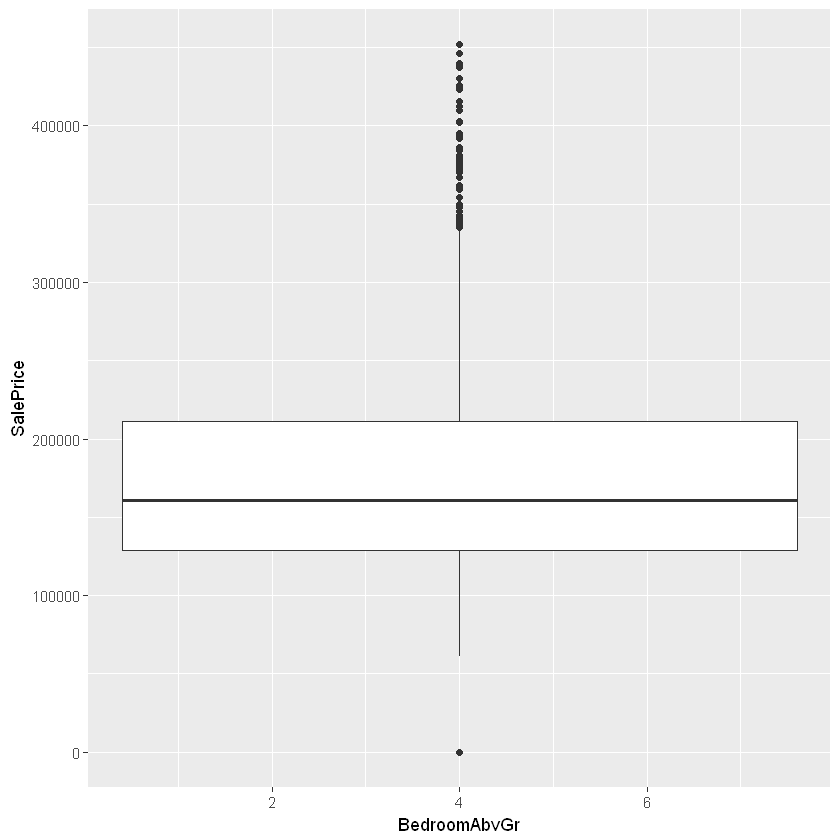

In [146]:
ggplot(home_est,aes(BedroomAbvGr,SalePrice))+geom_boxplot()